In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# connect to sqlite3 database
import sqlite3

# Replace with your database file path in Google Drive
db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Example query (replace with your actual query)
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


[('raw_data',), ('Loan_Approval',), ('Interest_Rate_Features',), ('Risk_classifier',)]


In [4]:
cursor.execute("SELECT * FROM raw_data LIMIT 1;")
columns = [desc[0] for desc in cursor.description]  # Extract column names
print(columns)

['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code', 'census_tract', 'conforming_loan_limit', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs', 'total_points_and_fees', 'origination_charges', 'discount_points', 'lender_credits', 'loan_term', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'property_value', 'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'multifamily_affordable_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score

In [5]:
# prompt: Print the first few rows in the raw_data table in the SQLite db

# Assuming 'raw_data' table exists
cursor.execute(f"SELECT * FROM {tables[0][0]} LIMIT 5;")  # Limit to the first 5 rows
results = cursor.fetchall()
for row in results:
  print(row)


(2023, '549300JOT0D4J0SZIK67', 12580, 'MD', 24510, 24510272005, 'C', 'FHA:First Lien', 'Single Family (1-4 Units):Site-Built', 'Ethnicity Not Available', 'Race Not Available', 'Sex Not Available', 6, 2, 2, 2, 1, 1, 2, 2, 2, 205000.0, None, 7.0, None, 2, 7265.43, None, 1395.0, '', '', 360, None, None, 2, 2, 2, 2, 205000, 1, 1, 3, 5, 1, None, None, None, 9, 9, 4, '', '', '', '', 4, '', '', '', '', 3, 3, 7, '', '', '', '', 7, '', '', '', '', 3, 3, 4, 4, 3, 3, 8888, 8888, None, None, 3, 3, 6, '', '', '', '', 10, '', '', '', 3451, 29.04, 121700, 132.95, 752, 595, 62)
(2023, '549300JOT0D4J0SZIK67', 49020, 'VA', 51069, 51069051102, 'C', 'FSA/RHS:First Lien', 'Single Family (1-4 Units):Site-Built', 'Ethnicity Not Available', 'Race Not Available', 'Sex Not Available', 6, 2, 2, 4, 1, 1, 2, 2, 2, 235000.0, None, 6.5, None, 2, 9762.93, None, 5172.56, 3852.56, '', 360, None, None, 2, 2, 2, 2, 235000, 1, 1, 3, 5, 1, None, None, None, 9, 9, 4, '', '', '', '', 4, '', '', '', '', 3, 3, 7, '', '', '', '

In [6]:
# Fetch the column names of the table
cursor.execute(f"PRAGMA table_info({tables[0][0]});")
columns_info = cursor.fetchall()
columns = [col[1] for col in columns_info]

# Loop through each column and update 'NA' with NULL
for column in columns:
    # Ensure the column name is quoted if it contains special characters
    quoted_column = f'"{column}"'  # Quote the column name
    cursor.execute(f"UPDATE {tables[0][0]} SET {quoted_column} = NULL WHERE {quoted_column} = 'NA';")
    conn.commit()

print("Replaced all 'NA' occurrences with NULL in the table.")



Replaced all 'NA' occurrences with NULL in the table.


In [7]:
# Check the first few rows of the updated table
cursor.execute(f"SELECT * FROM {tables[0][0]} LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)


(2023, '549300JOT0D4J0SZIK67', 12580, 'MD', 24510, 24510272005, 'C', 'FHA:First Lien', 'Single Family (1-4 Units):Site-Built', 'Ethnicity Not Available', 'Race Not Available', 'Sex Not Available', 6, 2, 2, 2, 1, 1, 2, 2, 2, 205000.0, None, 7.0, None, 2, 7265.43, None, 1395.0, '', '', 360, None, None, 2, 2, 2, 2, 205000, 1, 1, 3, 5, 1, None, None, None, 9, 9, 4, '', '', '', '', 4, '', '', '', '', 3, 3, 7, '', '', '', '', 7, '', '', '', '', 3, 3, 4, 4, 3, 3, 8888, 8888, None, None, 3, 3, 6, '', '', '', '', 10, '', '', '', 3451, 29.04, 121700, 132.95, 752, 595, 62)
(2023, '549300JOT0D4J0SZIK67', 49020, 'VA', 51069, 51069051102, 'C', 'FSA/RHS:First Lien', 'Single Family (1-4 Units):Site-Built', 'Ethnicity Not Available', 'Race Not Available', 'Sex Not Available', 6, 2, 2, 4, 1, 1, 2, 2, 2, 235000.0, None, 6.5, None, 2, 9762.93, None, 5172.56, 3852.56, '', 360, None, None, 2, 2, 2, 2, 235000, 1, 1, 3, 5, 1, None, None, None, 9, 9, 4, '', '', '', '', 4, '', '', '', '', 3, 3, 7, '', '', '', '

#### List of proposed models

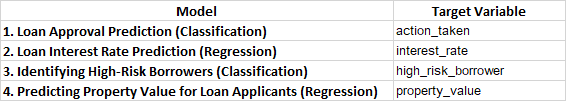

#### Dropping lein, state and county code since they are purely used as identifiers in the dataset

In [8]:
cursor.execute(f"SELECT * FROM {tables[0][0]}")
data = cursor.fetchall()

# Load data into a pandas DataFrame
capstone_data = pd.DataFrame(data, columns=columns)

# Show the first few rows of the DataFrame
capstone_data.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300JOT0D4J0SZIK67,12580,MD,24510.0,2.451027e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,,,,3451,29.04,121700,132.95,752,595,62
1,2023,549300JOT0D4J0SZIK67,49020,VA,51069.0,5.106905e+10,C,FSA/RHS:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,,,,7547,41.91,99900,82.41,1480,2094,27
2,2023,549300JOT0D4J0SZIK67,15680,MD,24037.0,2.403788e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,,,,7514,26.48,142600,110.50,1863,2411,14
3,2023,549300JOT0D4J0SZIK67,12580,MD,24005.0,2.400541e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,,,,6095,10.98,121700,146.25,1974,2310,39
4,2023,549300JOT0D4J0SZIK67,47894,VA,51013.0,5.101310e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,,,,1912,58.42,150100,123.07,560,355,53


In [9]:
capstone_data.drop(columns=['lei','activity_year','state_code','county_code'], inplace=True)

In [10]:
# Columns to remove
columns_to_remove = {'lei', 'activity_year', 'state_code', 'county_code'}

# Remove the specified columns
filtered_columns = [col for col in columns if col not in columns_to_remove]

print(filtered_columns)  # Display remaining columns

['derived_msa-md', 'census_tract', 'conforming_loan_limit', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs', 'total_points_and_fees', 'origination_charges', 'discount_points', 'lender_credits', 'loan_term', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'property_value', 'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'multifamily_affordable_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'applicant_

In [11]:
capstone_data.head()

,derived_msa-md,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,12580,2.451027e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,,,,3451,29.04,121700,132.95,752,595,62
1,49020,5.106905e+10,C,FSA/RHS:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,,,,7547,41.91,99900,82.41,1480,2094,27
2,15680,2.403788e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,,,,7514,26.48,142600,110.50,1863,2411,14
3,12580,2.400541e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,,,,6095,10.98,121700,146.25,1974,2310,39
4,47894,5.101310e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,2,...,,,,1912,58.42,150100,123.07,560,355,53


#### Dropping Race, ethnicity, and Sex related columns

In [12]:
# Define keywords to filter out
drop_keywords = ["race", "ethnicity", "sex"]

# Further filter columns that contain any of the drop keywords
filtered_columns = [col for col in filtered_columns if not any(keyword in col.lower() for keyword in drop_keywords)]

#print("Final columns after filtering:", filtered_columns)
for col in filtered_columns:
    print(col)
print(len(filtered_columns))

derived_msa-md
census_tract
conforming_loan_limit
derived_loan_product_type
derived_dwelling_category
action_taken
purchaser_type
preapproval
loan_type
loan_purpose
lien_status
reverse_mortgage
open-end_line_of_credit
business_or_commercial_purpose
loan_amount
loan_to_value_ratio
interest_rate
rate_spread
hoepa_status
total_loan_costs
total_points_and_fees
origination_charges
discount_points
lender_credits
loan_term
prepayment_penalty_term
intro_rate_period
negative_amortization
interest_only_payment
balloon_payment
other_nonamortizing_features
property_value
construction_method
occupancy_type
manufactured_home_secured_property_type
manufactured_home_land_property_interest
total_units
multifamily_affordable_units
income
debt_to_income_ratio
applicant_credit_score_type
co-applicant_credit_score_type
applicant_age
co-applicant_age
applicant_age_above_62
co-applicant_age_above_62
submission_of_application
initially_payable_to_institution
aus-1
aus-2
aus-3
aus-4
aus-5
denial_reason-1
denia

#### dropping columns with missing data > 95%

In [13]:
# Initialize a dictionary to store missing percentages
missing_percentage = {}

# Calculate missing percentage for each column
for col in filtered_columns:
    cursor.execute(f'SELECT COUNT(*) FROM raw_data WHERE "{col}" IS NULL;')
    null_count = cursor.fetchone()[0]

    cursor.execute("SELECT COUNT(*) FROM raw_data;")
    total_count = cursor.fetchone()[0]

    missing_percentage[col] = (null_count / total_count) * 100 if total_count > 0 else 0

# Identify columns with more than 95% missing values
columns_to_drop = [col for col, percent in missing_percentage.items() if percent > 95]

# Print the columns to drop
print("Columns to drop due to high missing values:", columns_to_drop)

# Final columns after removing high missing value columns
final_columns = [col for col in filtered_columns if col not in columns_to_drop]
print("Final columns after all filtering:", final_columns)

Columns to drop due to high missing values: ['total_points_and_fees', 'prepayment_penalty_term', 'multifamily_affordable_units']
Final columns after all filtering: ['derived_msa-md', 'census_tract', 'conforming_loan_limit', 'derived_loan_product_type', 'derived_dwelling_category', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs', 'origination_charges', 'discount_points', 'lender_credits', 'loan_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'property_value', 'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_cre

In [14]:
len(final_columns)

61

In [15]:
missing_percentage = capstone_data.isnull().sum() / len(capstone_data) * 100
columns_to_drop = missing_percentage[missing_percentage > 95].index

In [16]:
columns_to_drop

Index(['total_points_and_fees', 'prepayment_penalty_term',
       'multifamily_affordable_units'],
      dtype='object')

In [17]:
capstone_data = capstone_data[final_columns]

In [18]:
list(capstone_data)

['derived_msa-md',
 'census_tract',
 'conforming_loan_limit',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'reverse_mortgage',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'hoepa_status',
 'total_loan_costs',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'intro_rate_period',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'other_nonamortizing_features',
 'property_value',
 'construction_method',
 'occupancy_type',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_credit_score_type',
 'co-applicant_credit_score_type',
 'applicant_age',
 'co-applicant_age',
 'applicant_age_above_62',
 'co-applicant_age_above_62',
 'submission_

In [19]:
len(capstone_data)

536841

#### Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Categorical columns list (nominal and ordinal)
one_hot_cols = [
    'derived_loan_product_type', 'derived_dwelling_category',
    'conforming_loan_limit', 'loan_type', 'loan_purpose', 'lien_status',
    'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type',
    'manufactured_home_land_property_interest', 'submission_of_application',
    'initially_payable_to_institution', 'aus-1'
]

label_encode_cols = [
    'applicant_credit_score_type', 'co-applicant_credit_score_type', 'action_taken', 'purchaser_type',
    'preapproval', 'hoepa_status'
]

binary_cols = [
    'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose',
    'negative_amortization', 'interest_only_payment', 'balloon_payment',
    'other_nonamortizing_features', 'applicant_age_above_62', 'co-applicant_age_above_62'
]

# Handle missing values in categorical columns
capstone_data[one_hot_cols + label_encode_cols] = capstone_data[one_hot_cols + label_encode_cols].fillna("Unknown")

# One-Hot Encoding
df_encoded = pd.get_dummies(capstone_data, columns=one_hot_cols, drop_first=True)

# Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

# Binary Encoding (Convert categorical to numeric)
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}).fillna(0).astype(int)

print(df_encoded.head())


   derived_msa-md  census_tract  action_taken  purchaser_type  preapproval  \
0           12580  2.451027e+10             5               2            1   
1           49020  5.106905e+10             5               2            1   
2           15680  2.403788e+10             5               2            1   
3           12580  2.400541e+10             5               2            1   
4           47894  5.101310e+10             5               2            1   

   reverse_mortgage  open-end_line_of_credit  business_or_commercial_purpose  \
0                 0                        0                               0   
1                 0                        0                               0   
2                 0                        0                               0   
3                 0                        0                               0   
4                 0                        0                               0   

   loan_amount loan_to_value_ratio  ... initially_

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df_encoded.describe())

# Check for missing values
print(df_encoded.isnull().sum())

# Check data types
print(df_encoded.dtypes.value_counts())

# Distribution of target variables
#target_cols = ["action_taken", "interest_rate", "denial_reason-1", "property_value"]
#for col in target_cols:
    #if col in df_encoded.columns:
        #plt.figure(figsize=(6, 4))
      # sns.histplot(df_encoded[col], bins=30, kde=True)
        #plt.title(f"Distribution of {col}")
        #plt.show()

       derived_msa-md  census_tract   action_taken  purchaser_type  \
count   536841.000000  5.320220e+05  536841.000000   536841.000000   
mean     41397.258134  3.945323e+10       1.575200        1.594398   
std      22428.977143  1.410952e+10       1.827712        2.641486   
min      12580.000000  1.100100e+10       0.000000        0.000000   
25%      23224.000000  2.403170e+10       0.000000        0.000000   
50%      47260.000000  5.104301e+10       0.000000        0.000000   
75%      47894.000000  5.115521e+10       3.000000        2.000000   
max      99999.000000  5.184000e+10       7.000000       10.000000   

         preapproval  reverse_mortgage  open-end_line_of_credit  \
count  536841.000000          536841.0                 536841.0   
mean        0.981890               0.0                      0.0   
std         0.133348               0.0                      0.0   
min         0.000000               0.0                      0.0   
25%         1.000000              

<ipython-input-22-03a1c1b5fdd6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace("Exempt", float("nan"), inplace=True)


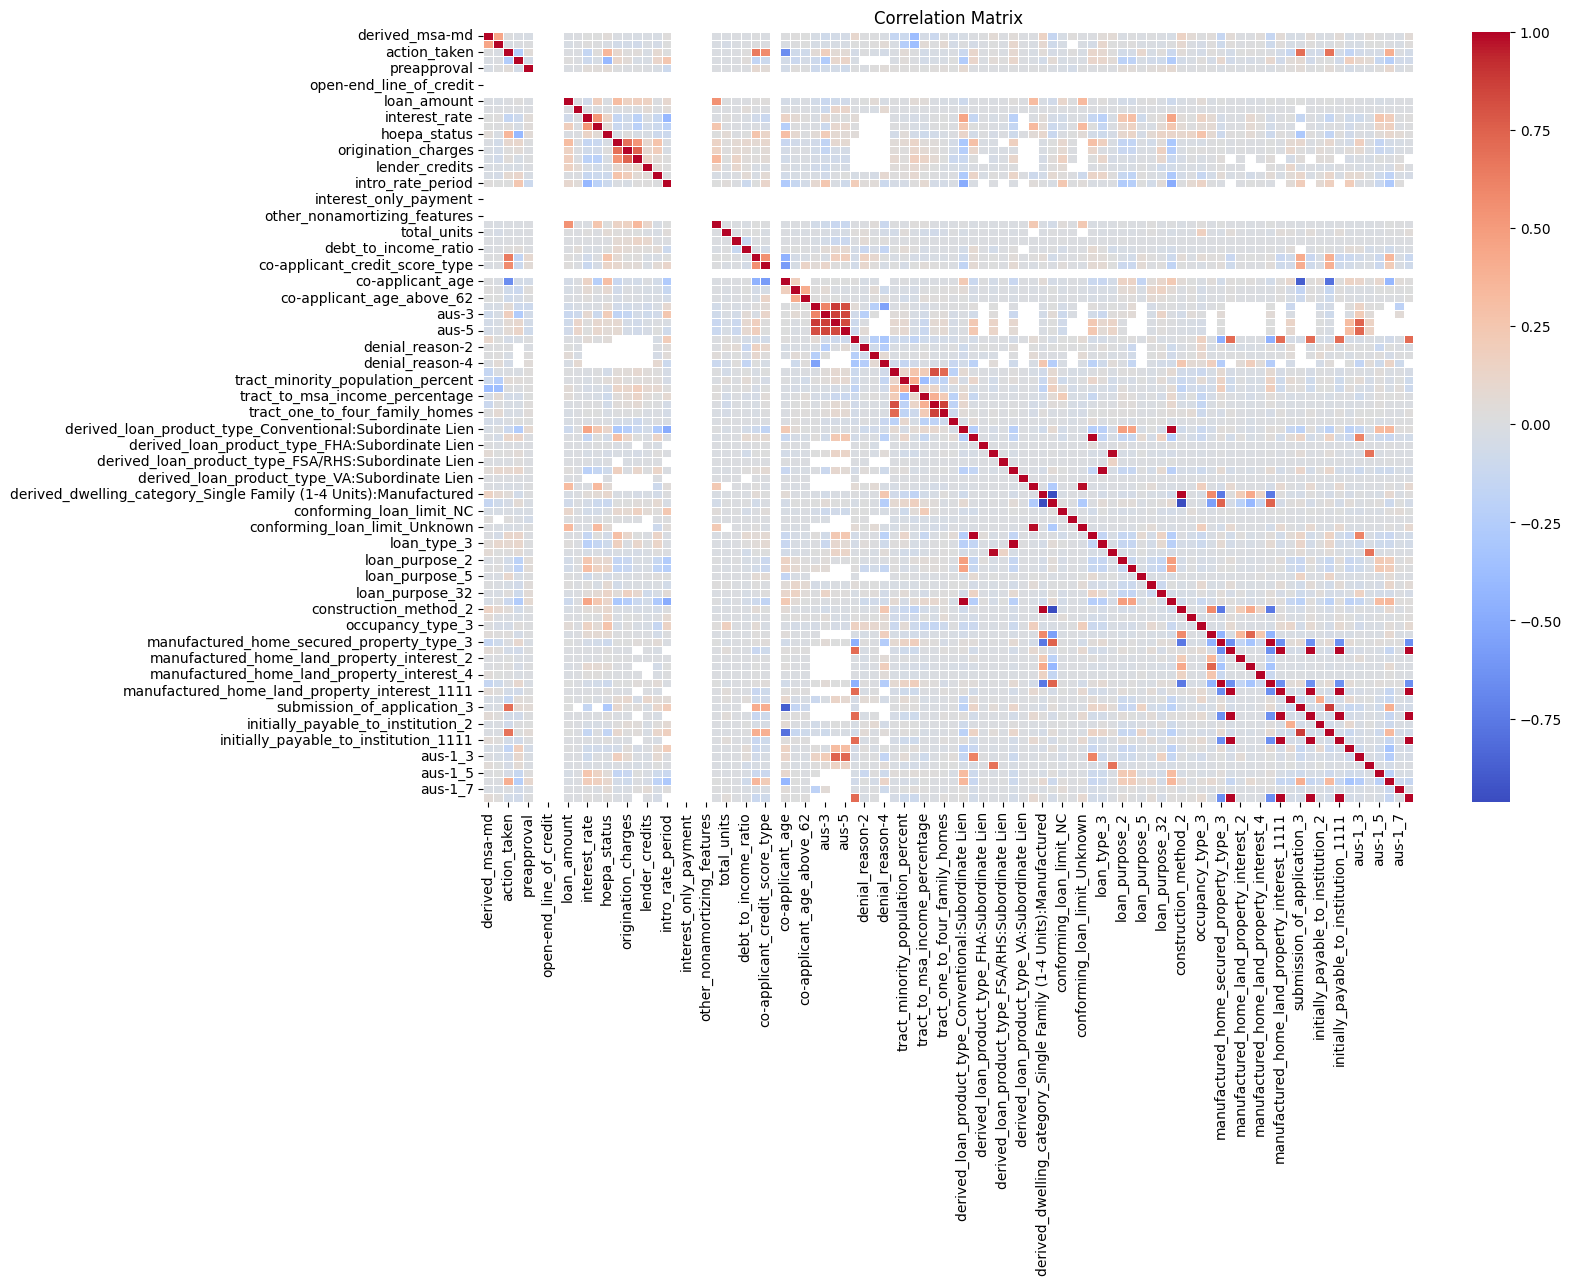

In [22]:
# Replace 'Exempt' or any non-numeric values with NaN
df_encoded.replace("Exempt", float("nan"), inplace=True)

# Convert all possible columns to numeric (coercing errors to NaN)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix (only for numeric columns)
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**1. Strong Positive Correlations (Red Squares)
Loan Amount & Property Value:**

Higher property values are associated with higher loan amounts.
This makes sense, as larger loans are typically required for more expensive properties.
Interest Rate & Rate Spread:

A strong correlation exists, indicating that rate spread increases as the interest rate rises.
Rate spread measures how much higher the loan’s interest rate is compared to a benchmark, so this is expected.
Loan Purpose & Loan Type:

Certain loan purposes (e.g., home purchase vs. refinancing) are highly associated with specific loan types (e.g., conventional vs. government-backed loans).

**2. Strong Negative Correlations (Blue Squares)
Debt-to-Income Ratio & Applicant Credit Score Type:**

A higher debt-to-income ratio tends to be associated with lower credit scores.
This suggests that applicants with high debt burdens may have lower creditworthiness.
Action Taken & Denial Reasons:

The likelihood of loan approval (action taken) negatively correlates with denial reasons.
If a loan is denied due to risk factors, the applicant is classified as high risk, supporting your classification goal for Model 3.

**3. Potential Redundant Features
Some variables show near-perfect correlation, meaning they might be redundant:**

Different encodings of loan types, purposes, and secured property types suggest that some categories might be merged or simplified.
"aus-1" variables (Automated Underwriting System decisions) show strong correlations, possibly indicating that only one of them is needed.

**4. Weak or No Correlation
Some variables do not show strong correlations with others:**

Some "aus-1" encodings and demographic-related variables seem weakly related to financial features.
Open-end lines of credit and balloon payments show relatively low correlation with other key financial indicators.

In [23]:
target_corr = df_encoded.corr()[["action_taken", "interest_rate", "denial_reason-1", "property_value"]]
print(target_corr.sort_values(by="action_taken", ascending=False))

                                    action_taken  interest_rate  \
action_taken                            1.000000      -0.142056   
submission_of_application_3             0.698663      -0.145094   
initially_payable_to_institution_3      0.682345      -0.144544   
applicant_credit_score_type             0.640418      -0.069611   
co-applicant_credit_score_type          0.576051      -0.114526   
...                                          ...            ...   
negative_amortization                        NaN            NaN   
interest_only_payment                        NaN            NaN   
balloon_payment                              NaN            NaN   
other_nonamortizing_features                 NaN            NaN   
applicant_age                                NaN            NaN   

                                    denial_reason-1  property_value  
action_taken                              -0.046114       -0.008575  
submission_of_application_3               -0.046669    

Next Steps
1. **Feature Selection**: Drop redundant variables to prevent multicollinearity in models.
2. **Standardization**: Normalize numerical variables with large value ranges before model training.
3. **Further EDA**: Check missing values and distributions for skewed data.

To-do:
1. Normalization of data
2. Selecting features model wise (some will be common between models, some not)(essentially have x1, x2, x3 and x4; also y1, y2, y3 and y4)

In [24]:
df_encoded.dtypes

,0
derived_msa-md,int64
census_tract,float64
action_taken,int64
purchaser_type,int64
preapproval,int64
...,...
aus-1_4,bool
aus-1_5,bool
aus-1_6,bool
aus-1_7,bool


In [25]:
# prompt: print out the column income from df_encoded's type

print(df_encoded['income'].dtype)

float64


In [26]:
# prompt: change all bool types to int64 in df_encoded

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype('int64')

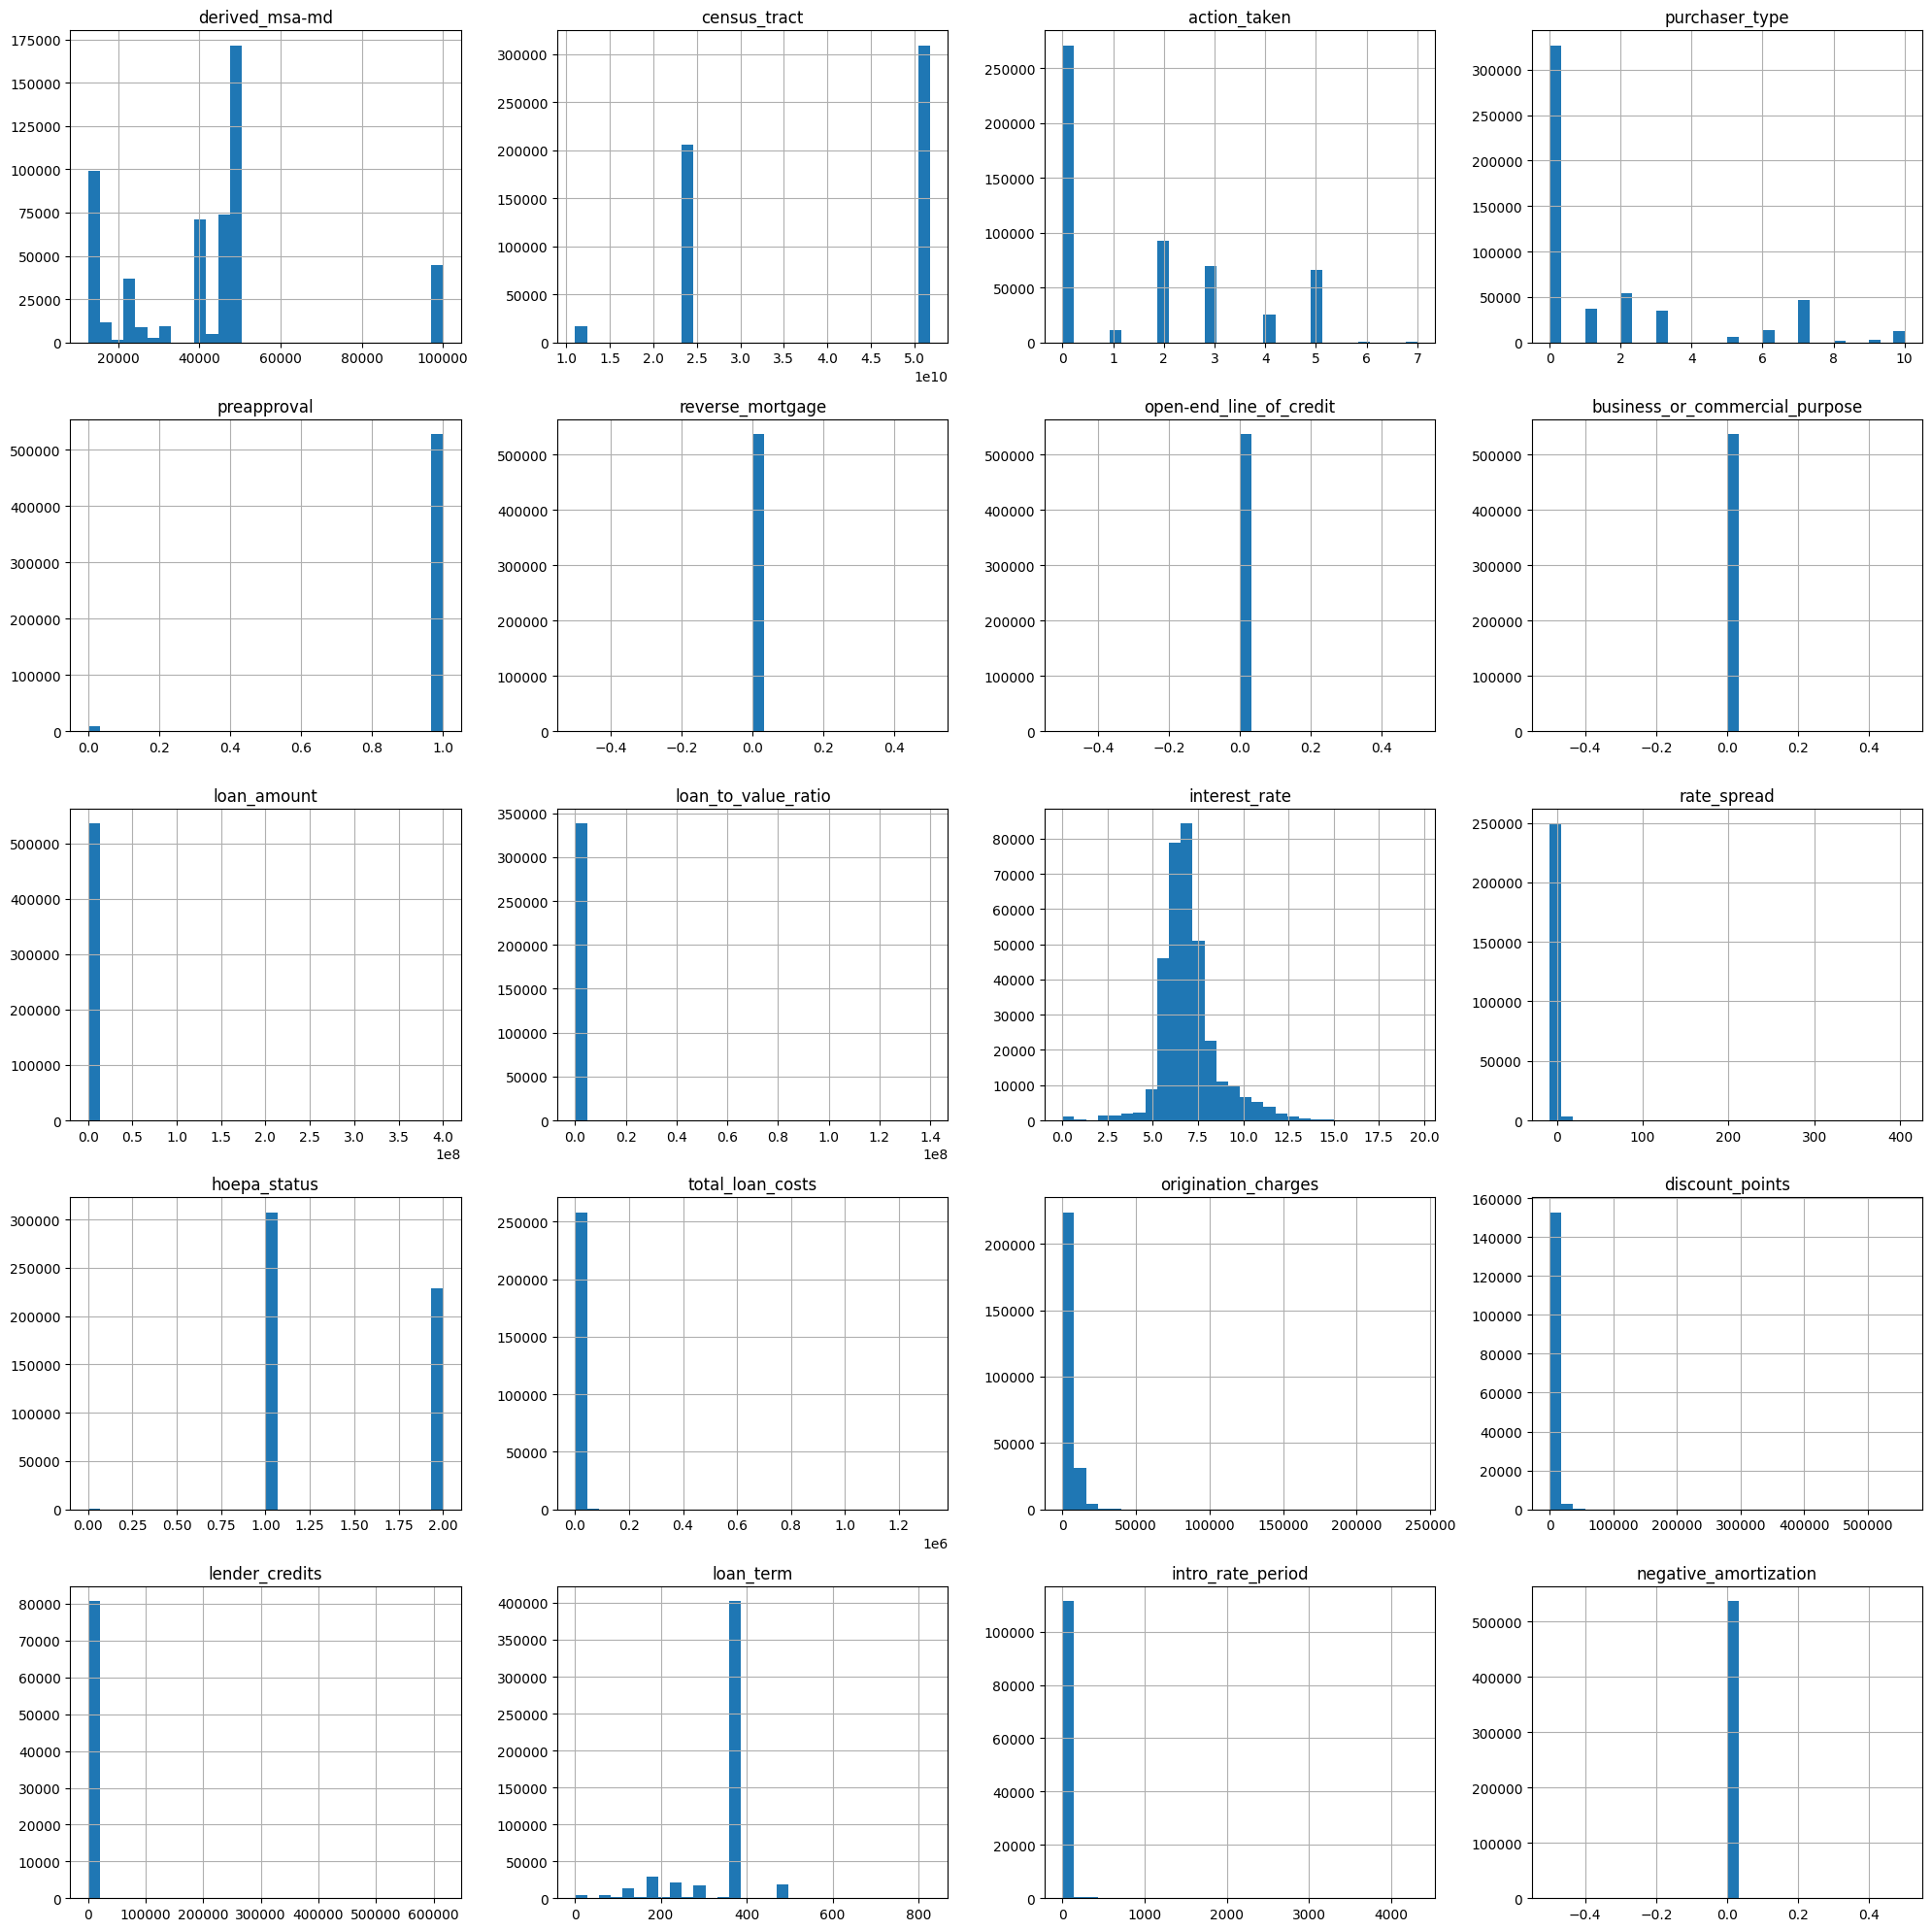

In [27]:
subset_df = df_encoded.iloc[:, :20]  # Select columns 1 to 20

# Plot histograms
subset_df.hist(figsize=(20, 20), bins=30, layout=(5, 4))  # 5 rows, 4 columns layout
plt.tight_layout()
plt.show()

In [28]:
from scipy import stats

for column in df_encoded.columns:
    # Check if the column is numeric before applying the test
    if pd.api.types.is_numeric_dtype(df_encoded[column]):
        statistic, p_value = stats.kstest(df_encoded[column], 'norm', args=(0, 1), alternative='two-sided')
        print(f"Column: {column}")
        print(f"Statistic: {statistic}")
        print(f"P-value: {p_value}")
        print('-' * 40)

Column: derived_msa-md
Statistic: 1.0
P-value: 0.0
----------------------------------------
Column: census_tract
Statistic: nan
P-value: nan
----------------------------------------
Column: action_taken
Statistic: 0.5
P-value: 0.0
----------------------------------------
Column: purchaser_type
Statistic: 0.5
P-value: 0.0
----------------------------------------
Column: preapproval
Statistic: 0.8232351009408422
P-value: 0.0
----------------------------------------
Column: reverse_mortgage
Statistic: 0.5
P-value: 0.0
----------------------------------------
Column: open-end_line_of_credit
Statistic: 0.5
P-value: 0.0
----------------------------------------
Column: business_or_commercial_purpose
Statistic: 0.5
P-value: 0.0
----------------------------------------
Column: loan_amount
Statistic: 1.0
P-value: 0.0
----------------------------------------
Column: loan_to_value_ratio
Statistic: nan
P-value: nan
----------------------------------------
Column: interest_rate
Statistic: nan
P-valu

# Normalizing Columns 0-20

In [29]:
df_normal = df_encoded

In [30]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df_normal['derived_msa-md'] = qt.fit_transform(df_normal[['derived_msa-md']])



In [31]:
#df_normal['interest_rate'] = np.log1p(df_normal['interest_rate'])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normal['derived_msa-md'] = scaler.fit_transform(df_normal[['derived_msa-md']])

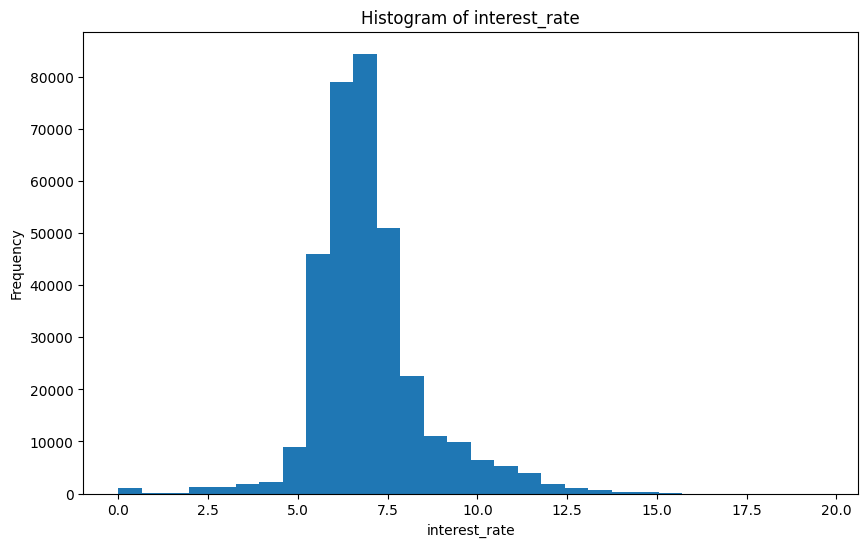

In [32]:
# prompt: plot n a histogram the column 'derived_msa-md' from df_encoded

plt.figure(figsize=(10, 6))
plt.hist(df_normal['interest_rate'], bins=30)
plt.xlabel('interest_rate')
plt.ylabel('Frequency')
plt.title('Histogram of interest_rate')
plt.show()


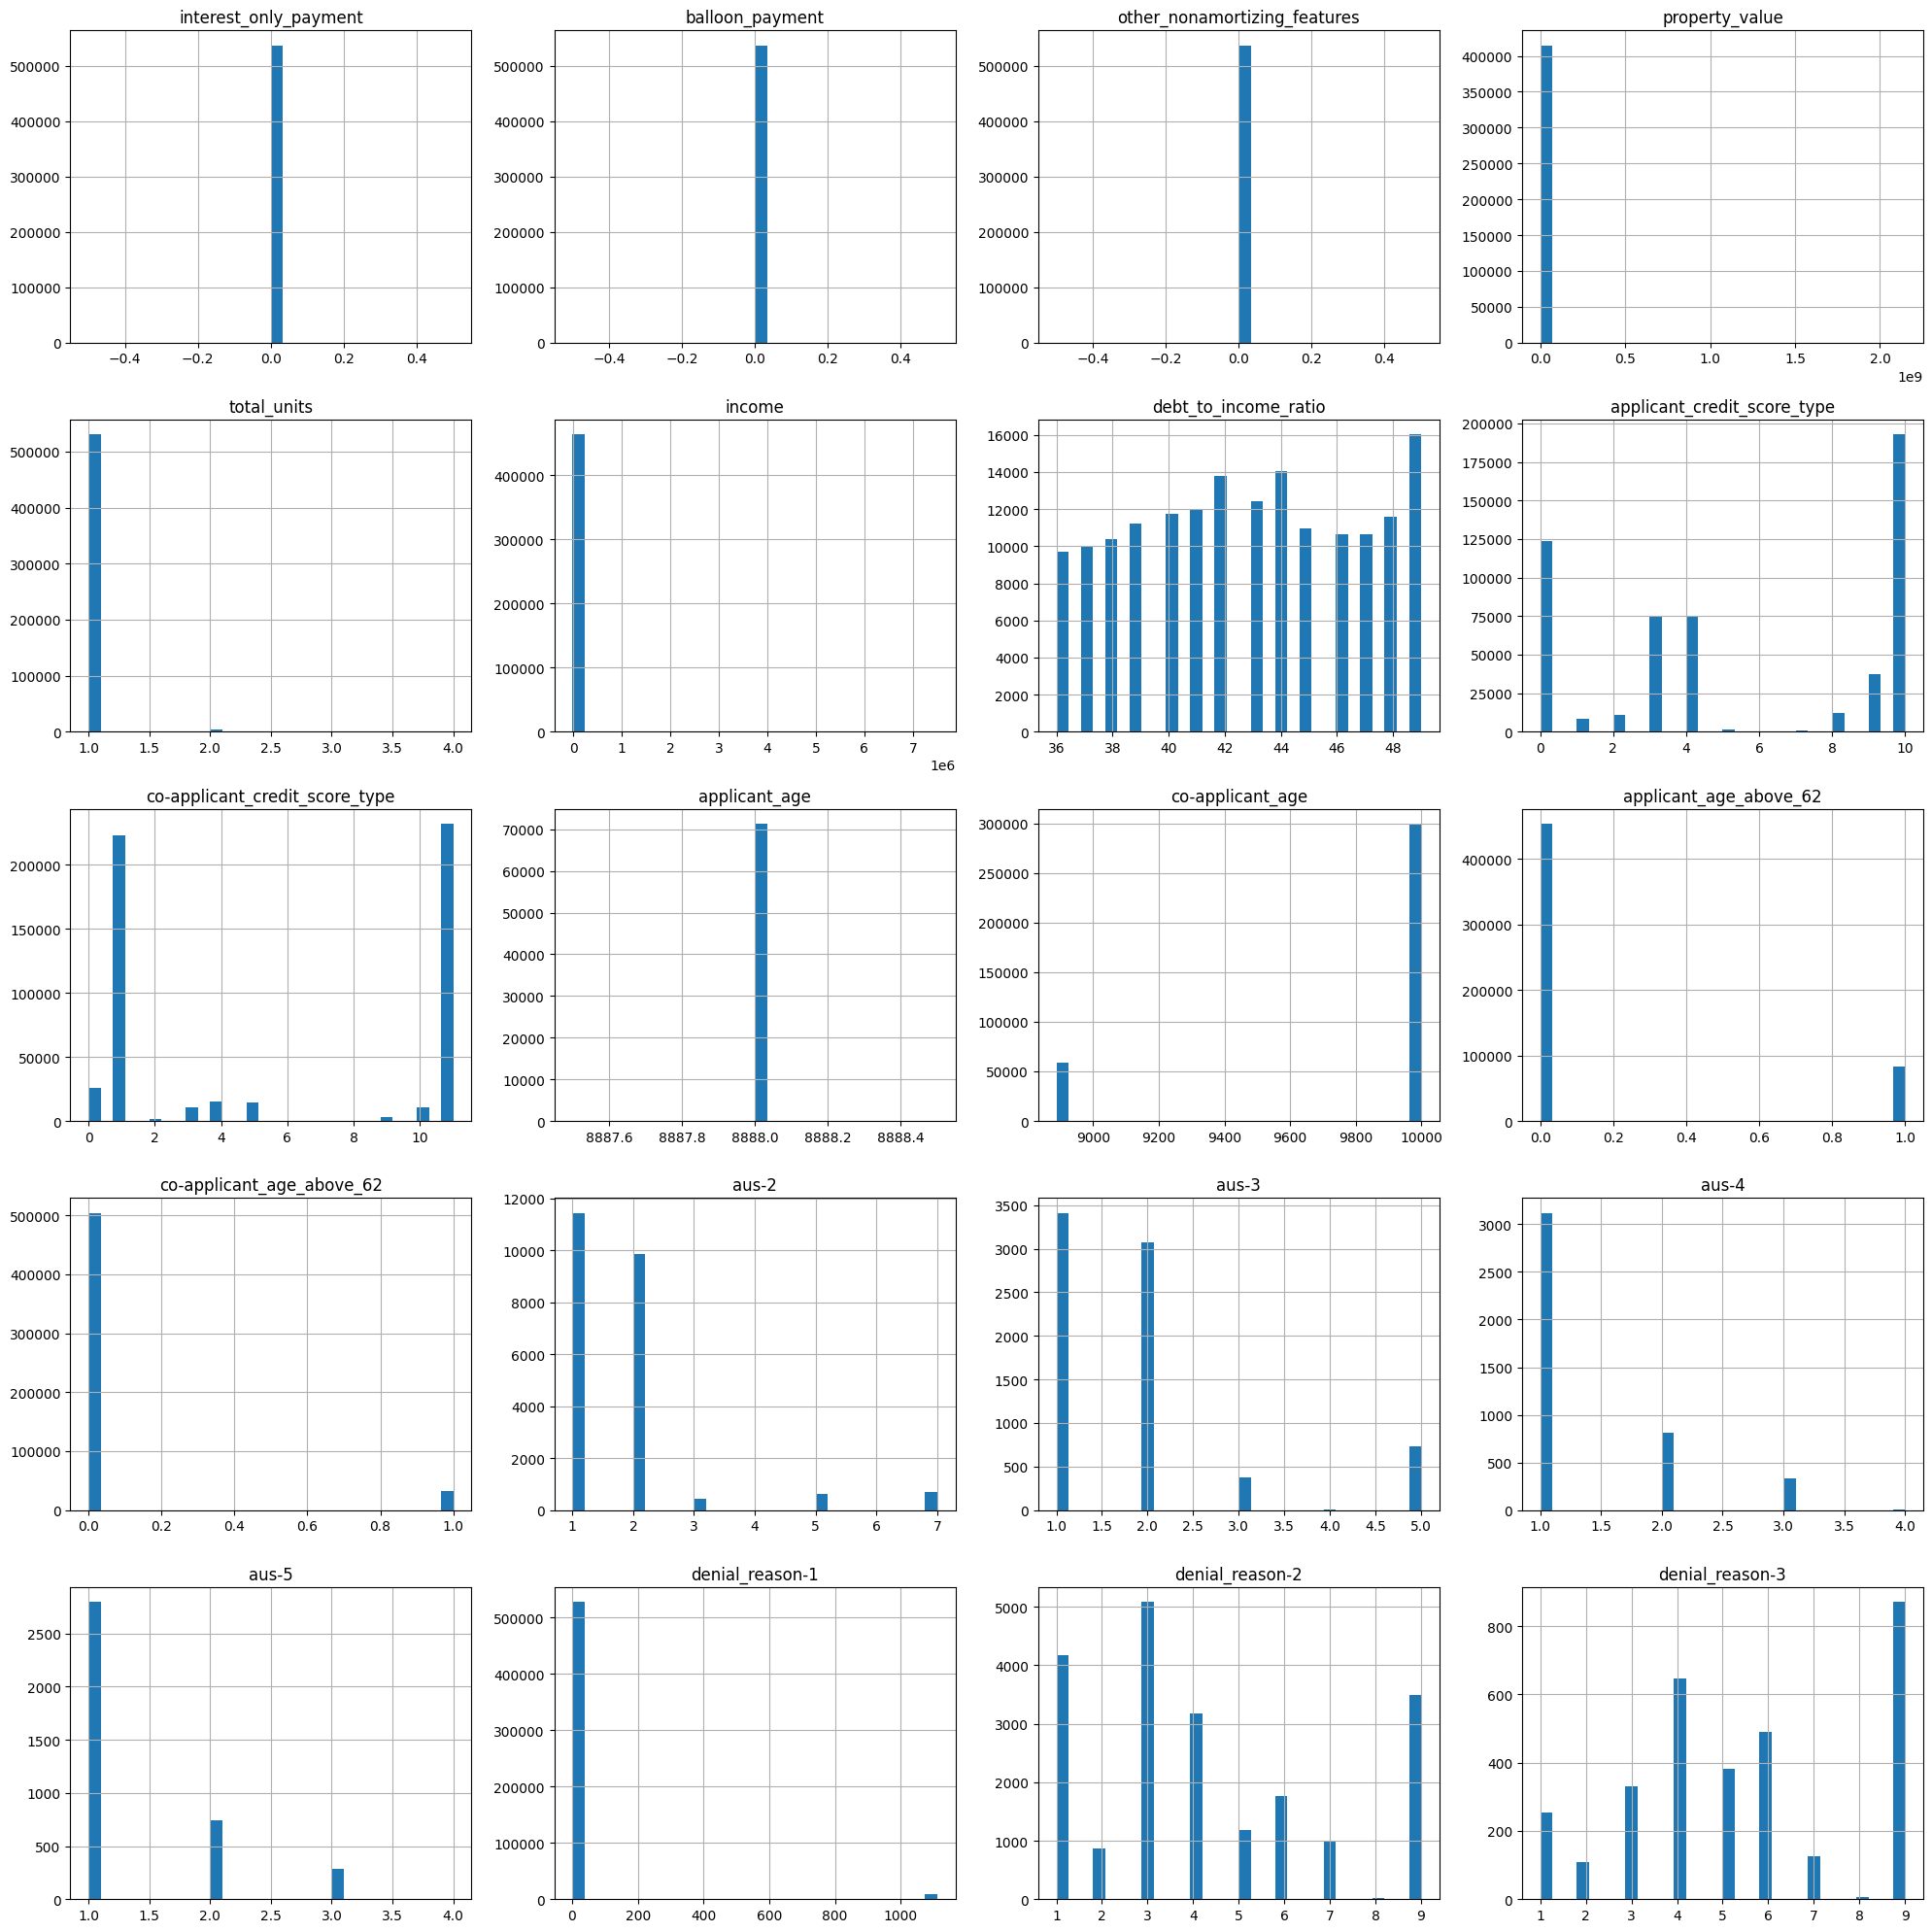

In [33]:
subset_df = df_encoded.iloc[:, 20:40]  # Select columns 21 to 40

# Plot histograms
subset_df.hist(figsize=(20, 20), bins=30, layout=(5, 4))  # 5 rows, 4 columns layout
plt.tight_layout()
plt.show()

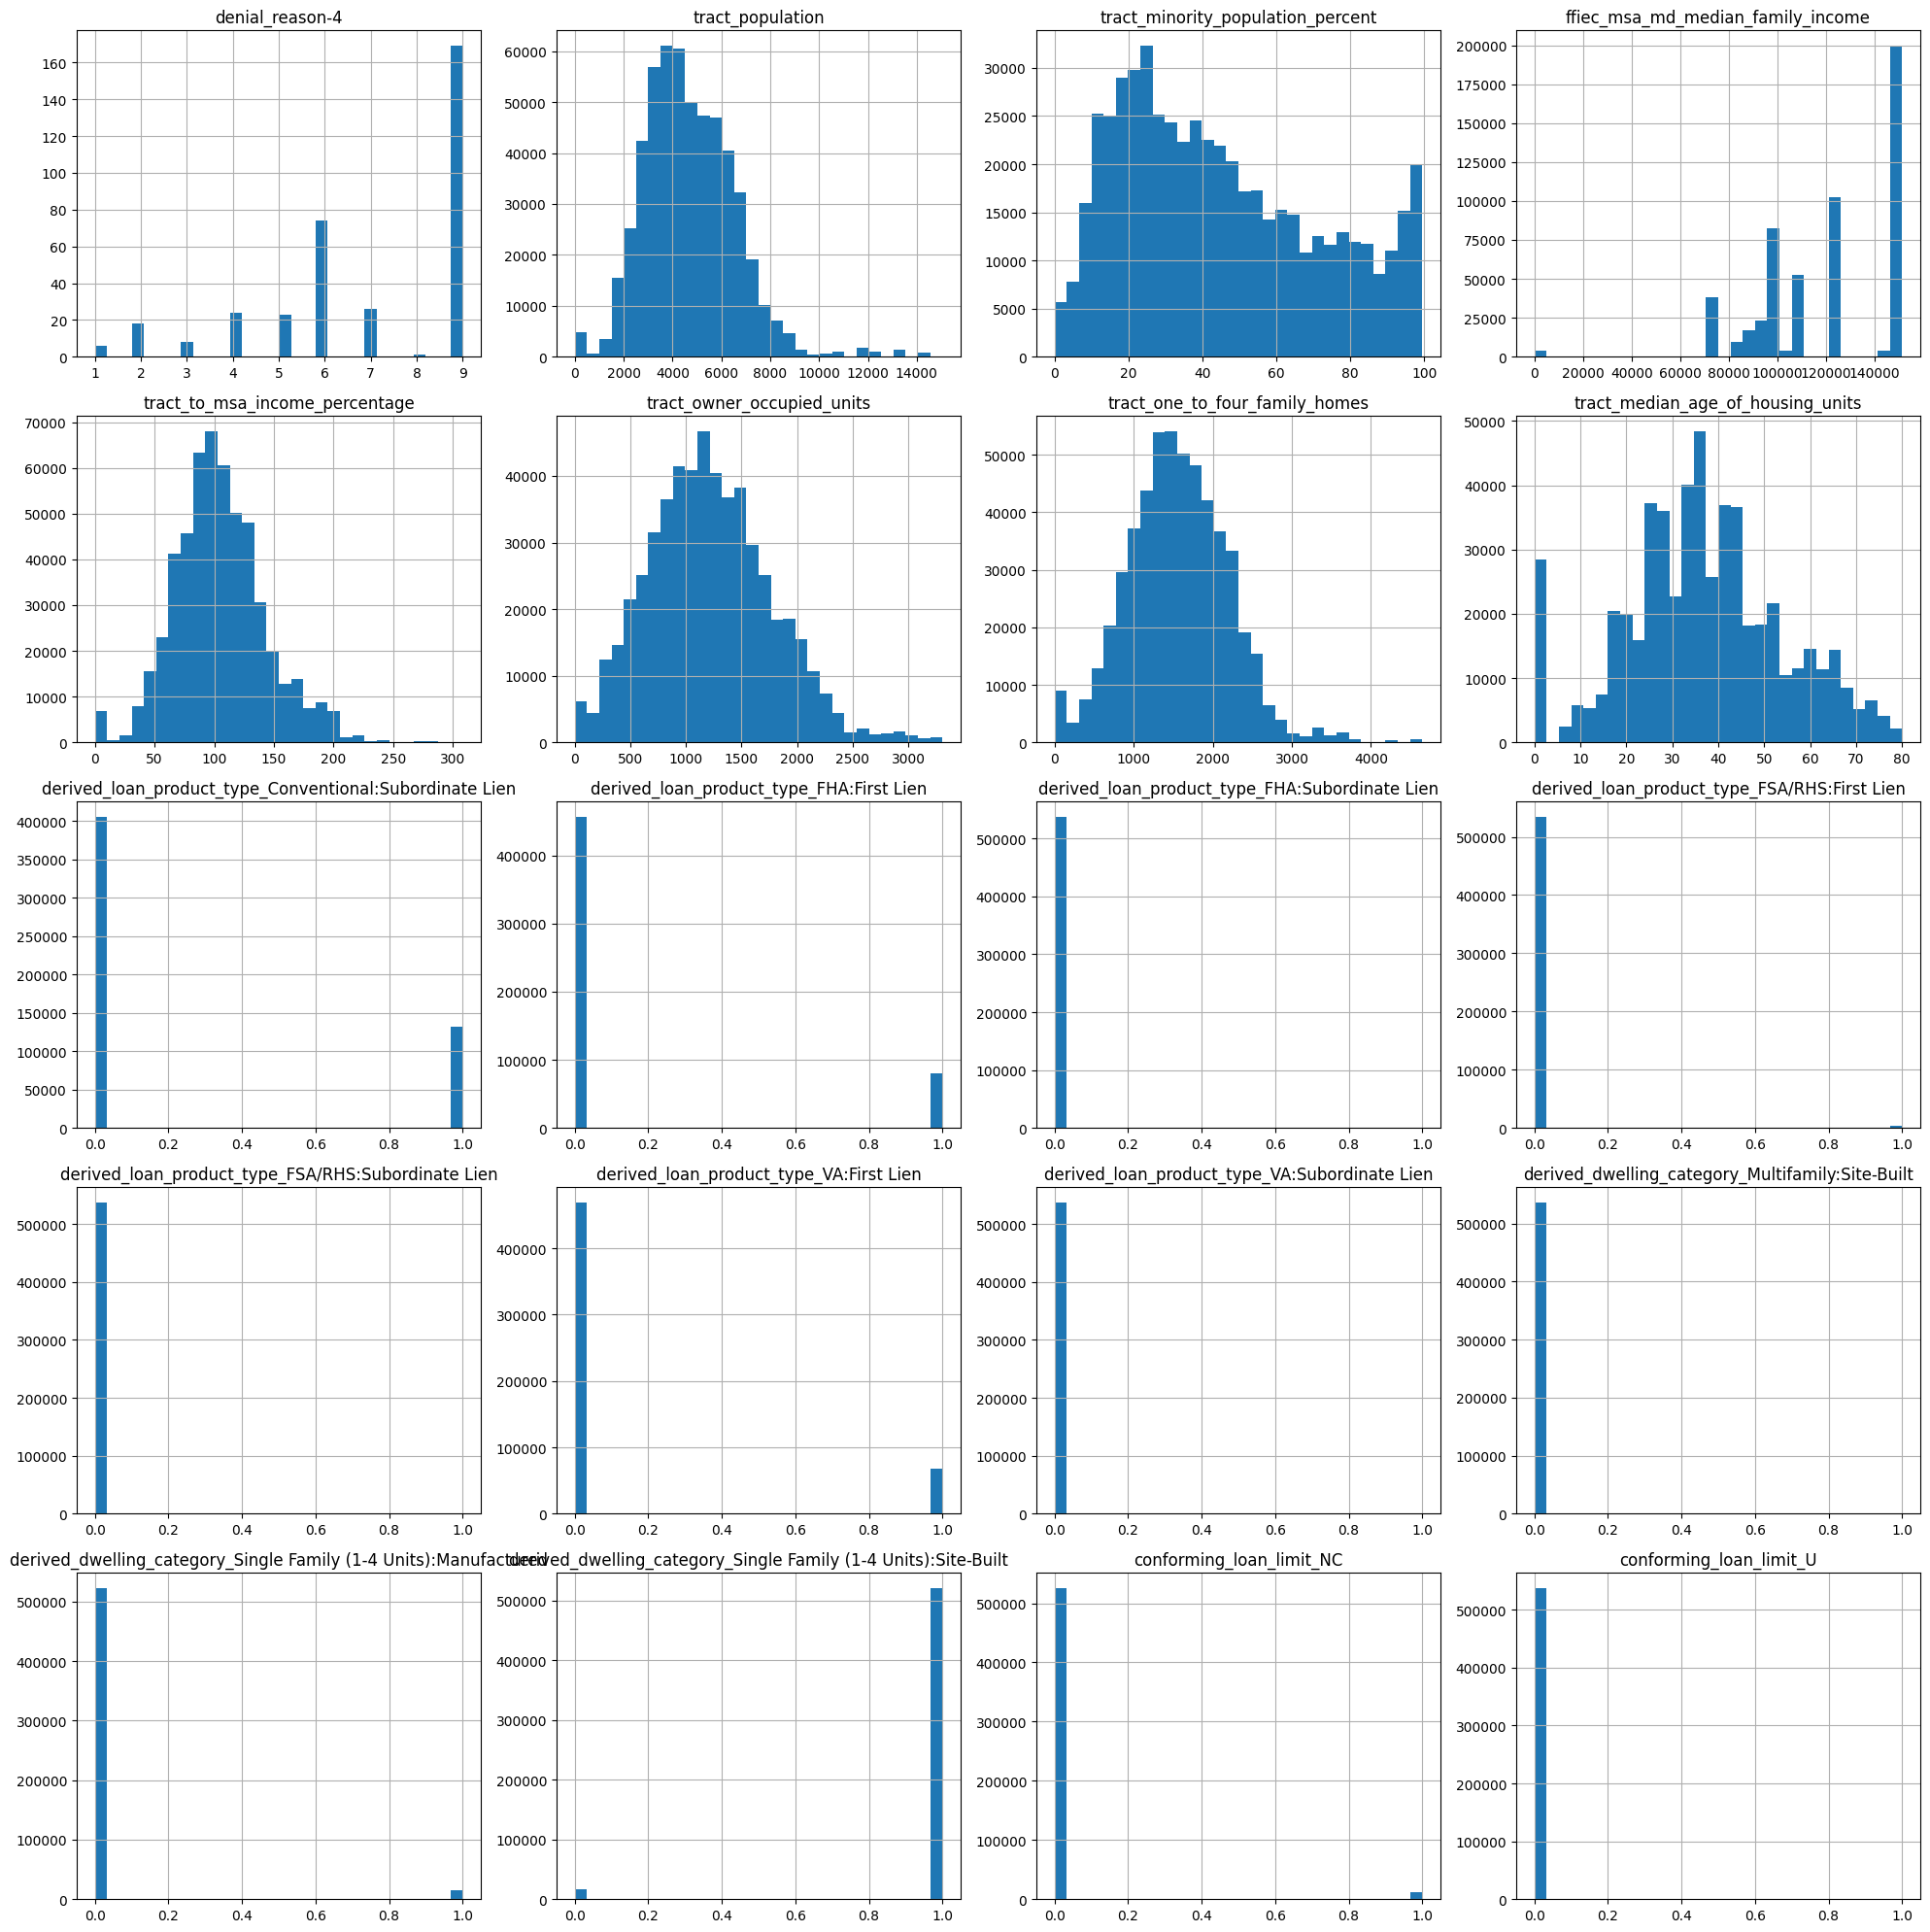

In [34]:
subset_df = df_encoded.iloc[:, 40:60]  # Select columns 41 to 60

# Plot histograms
subset_df.hist(figsize=(20, 20), bins=30, layout=(5, 4))  # 5 rows, 4 columns layout
plt.tight_layout()
plt.show()

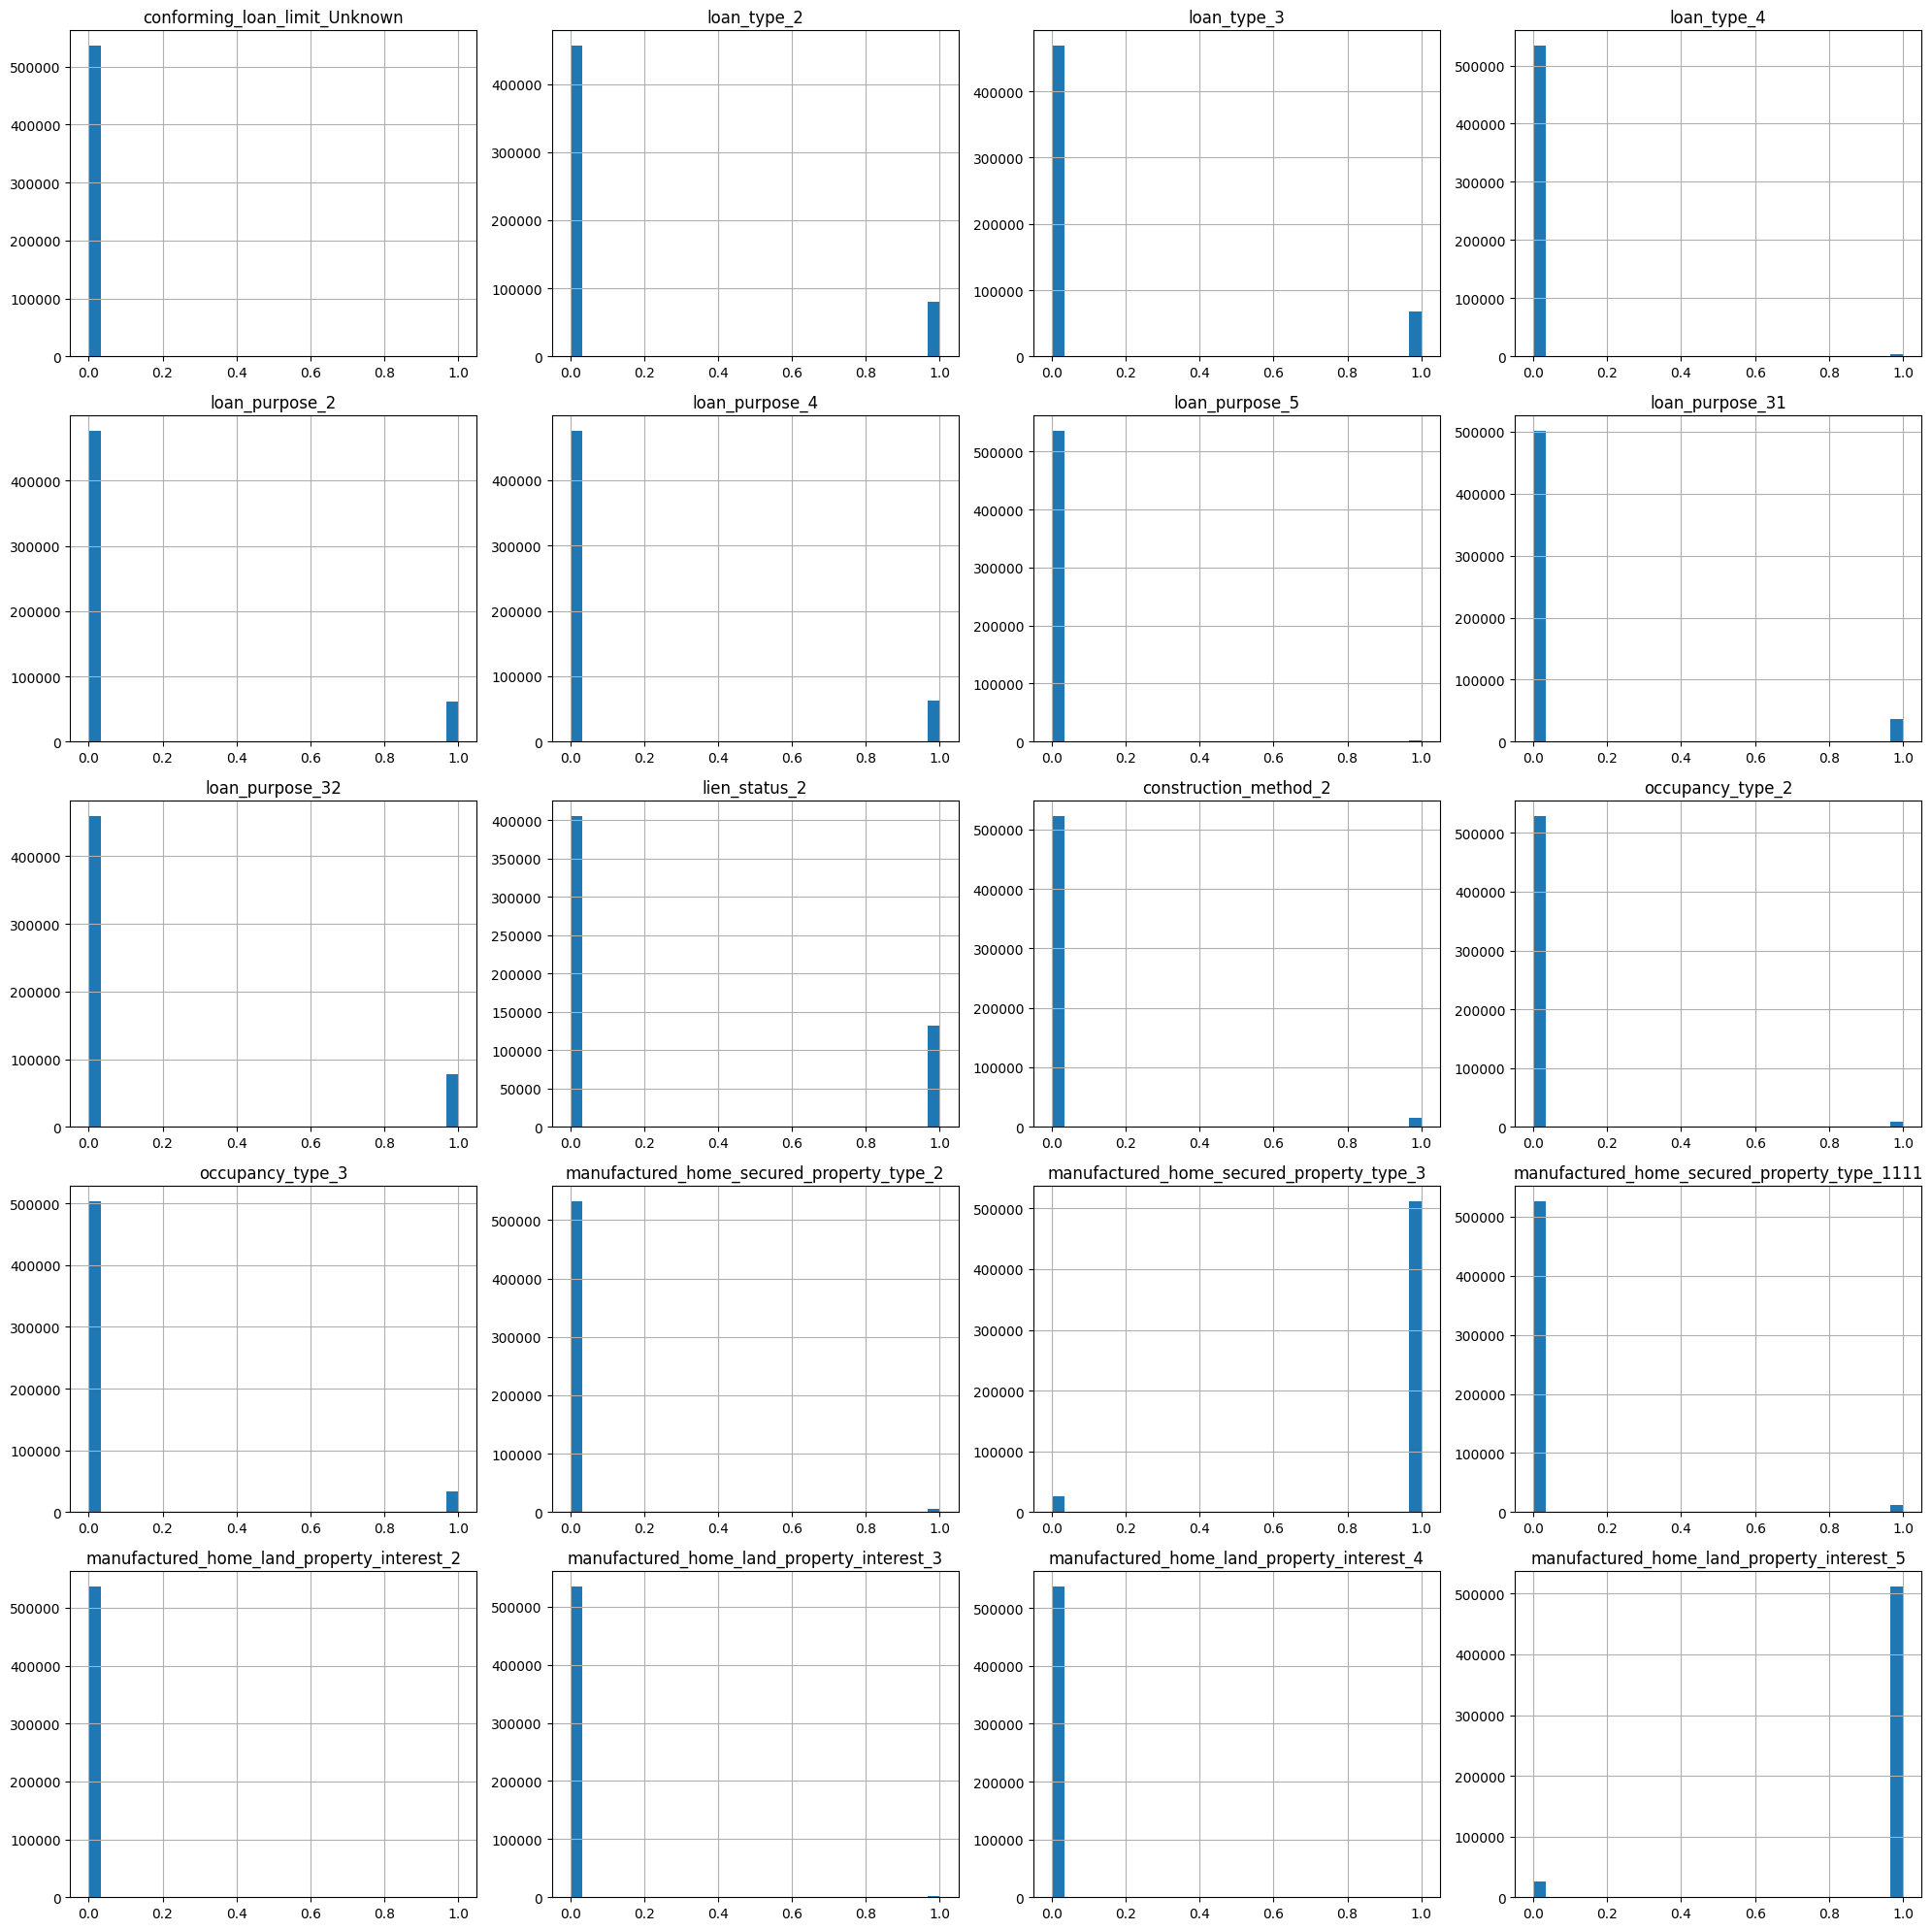

In [35]:
subset_df = df_encoded.iloc[:, 60:80]  # Select columns 61 to 80

# Plot histograms
subset_df.hist(figsize=(20, 20), bins=30, layout=(5, 4))  # 5 rows, 4 columns layout
plt.tight_layout()
plt.show()

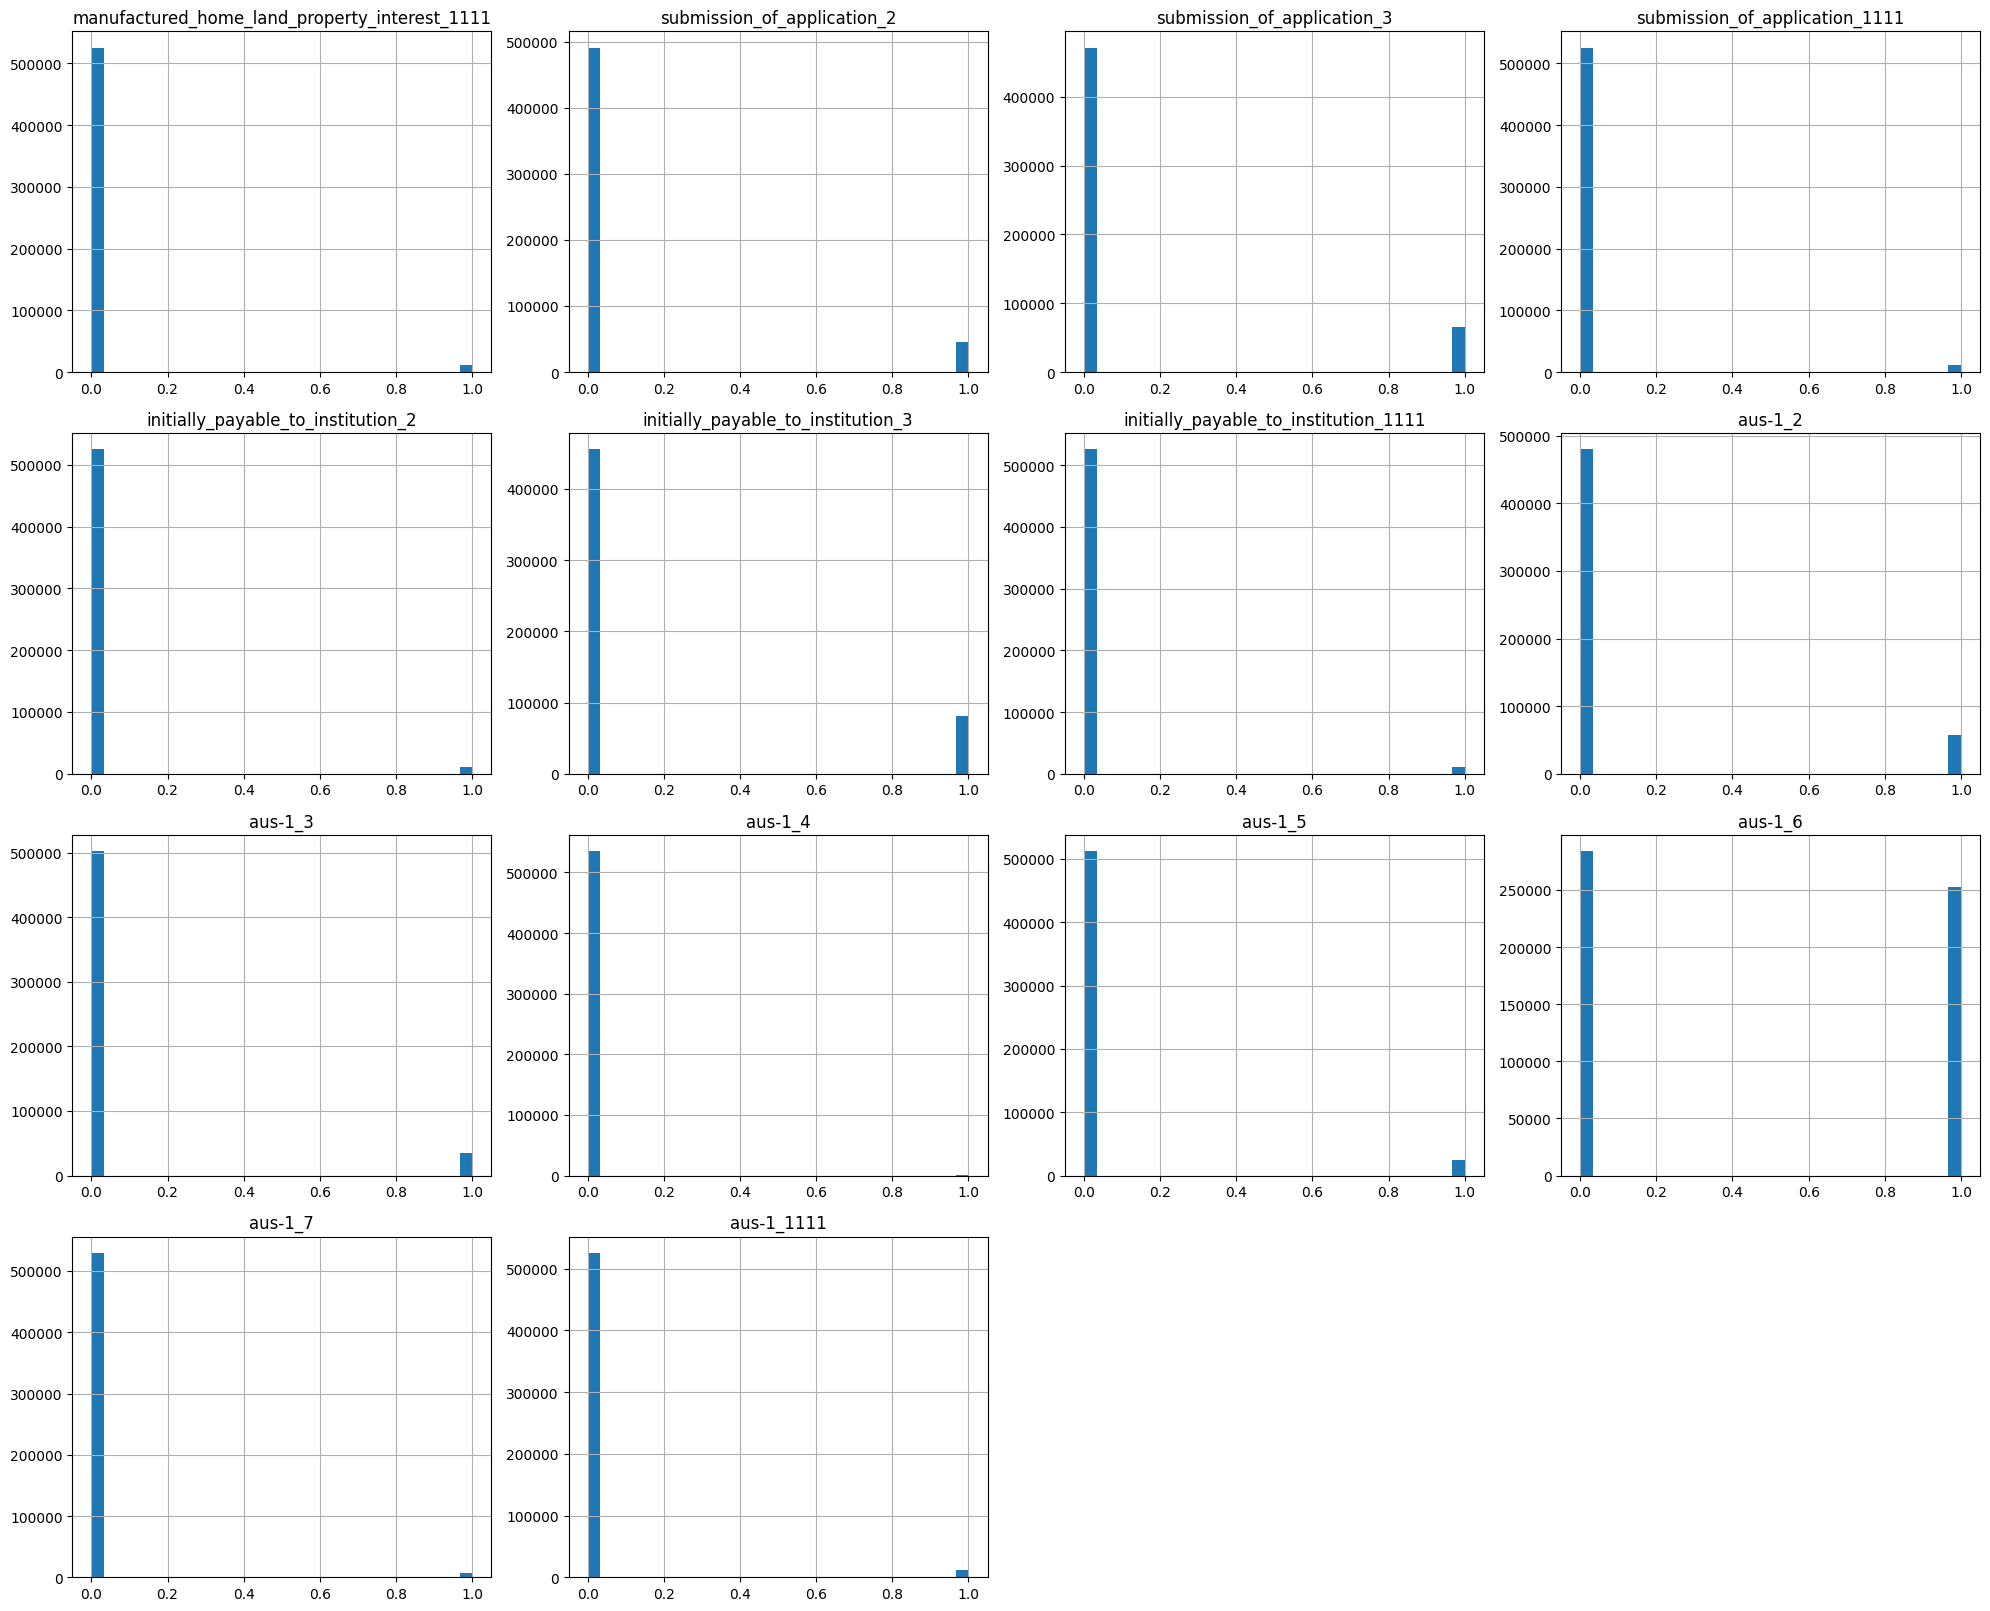

In [36]:
subset_df = df_encoded.iloc[:, 80:94]  # Select columns 81 to 94

# Plot histograms
subset_df.hist(figsize=(20, 20), bins=30, layout=(5, 4))  # 5 rows, 4 columns layout
plt.tight_layout()
plt.show()

In [37]:
# prompt: print how many columns are in df_encoded

print(len(df_encoded.columns))

94


#1. Loan Approval Prediction Classifier

In [52]:
# from sklearn.model_selection import train_test_split

# # Define target variable (Loan Approval)
# X = df_encoded.drop(columns=['action_taken'])
# y = df_encoded['action_taken']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# clf = RandomForestClassifier(n_estimators=100, random_state=42)

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Accuracy: 0.9564492544402947
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53920
           1       0.97      0.92      0.94      2214
           2       0.99      1.00      0.99     18507
           3       0.80      0.92      0.86     14099
           4       0.64      0.37      0.47      4984
           5       1.00      1.00      1.00     13381
           6       0.97      0.95      0.96        65
           7       0.94      0.89      0.92       199

    accuracy                           0.96    107369
   macro avg       0.91      0.88      0.89    107369
weighted avg       0.95      0.96      0.95    107369



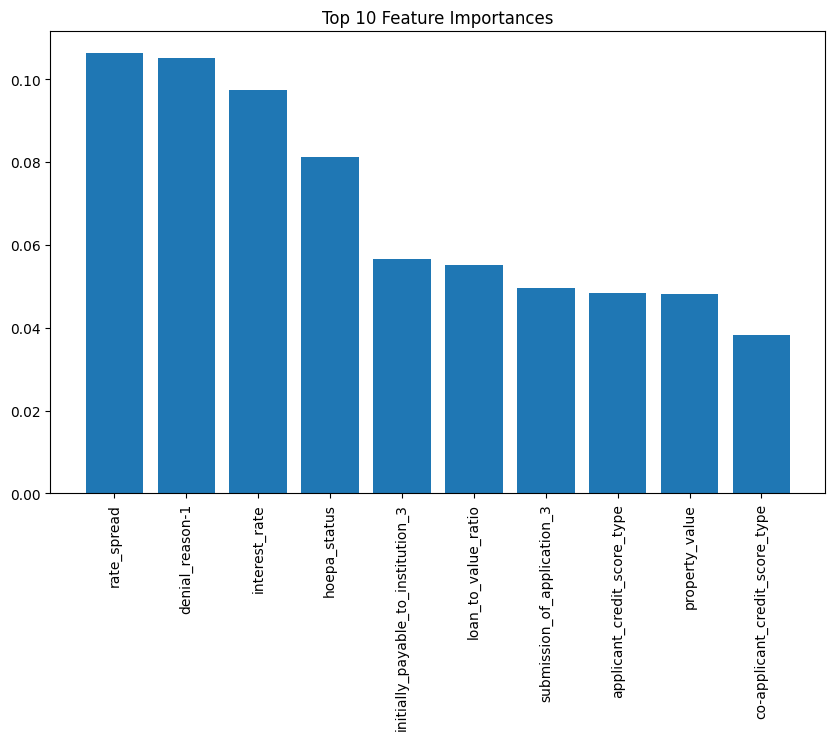

In [54]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Get feature importance
# importances = clf.feature_importances_
# indices = np.argsort(importances)[::-1]

# # Plot top 10 features
# plt.figure(figsize=(10,6))
# plt.title("Top 10 Feature Importances")
# plt.bar(range(10), importances[indices[:10]], align="center")
# plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=90)
# plt.show()

#XG Boost Classifier

In [55]:
# from xgboost import XGBClassifier

# # Initialize and train XGBoost model
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb.fit(X_train, y_train)

# # Predictions
# y_pred_xgb = xgb.predict(X_test)

# # Evaluate Performance
# print("🔹 XGBoost Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Results:
Accuracy: 0.9570825843586137
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53920
           1       0.96      0.92      0.94      2214
           2       0.99      1.00      1.00     18507
           3       0.80      0.92      0.86     14099
           4       0.65      0.37      0.47      4984
           5       1.00      1.00      1.00     13381
           6       0.97      0.95      0.96        65
           7       0.90      0.92      0.91       199

    accuracy                           0.96    107369
   macro avg       0.91      0.89      0.89    107369
weighted avg       0.95      0.96      0.95    107369



In [57]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid for XGBoost tuning
# param_grid_xgb = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize Grid Search
# grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#                                param_grid_xgb, cv=3, n_jobs=-1, verbose=2)

# # Train the model
# grid_search_xgb.fit(X_train, y_train)

# # Best Parameters
# print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# # Evaluate Tuned Model
# best_xgb = grid_search_xgb.best_estimator_
# y_pred_best_xgb = best_xgb.predict(X_test)

# print("🔹 Tuned XGBoost Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
# print(classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

POST FEATURE SELECTION

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-58-2521c1d8f973>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['action_taken'] = y  # Keep target variable


Selected Features: ['interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs', 'origination_charges', 'property_value', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'applicant_age', 'co-applicant_age', 'aus-5', 'derived_dwelling_category_Single Family (1-4 Units):Manufactured', 'occupancy_type_3', 'manufactured_home_secured_property_type_3', 'manufactured_home_secured_property_type_1111', 'action_taken']


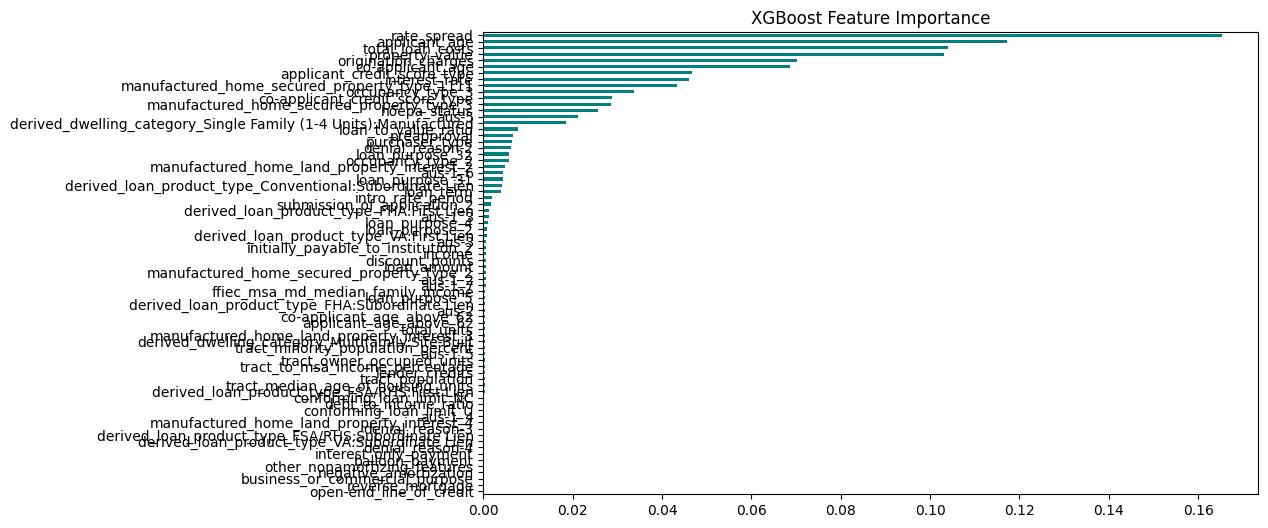

In [58]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import VarianceThreshold

# # Step 1: Drop Irrelevant Columns
# drop_columns = ['census_tract', 'derived_msa-md', 'denial_reason-1']
# df_selected = df_encoded.drop(columns=drop_columns, errors='ignore')

# # Step 2: Handle Multicollinearity
# corr_matrix = df_selected.corr().abs()
# high_corr_vars = set()

# # Identify highly correlated features (threshold = 0.85)
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if corr_matrix.iloc[i, j] > 0.85:
#             colname = corr_matrix.columns[i]
#             high_corr_vars.add(colname)

# df_selected = df_selected.drop(columns=high_corr_vars, errors='ignore')

# # Step 3: Feature Importance using XGBoost
# X = df_selected.drop(columns=['action_taken'])  # Predictors
# y = df_selected['action_taken']  # Target Variable

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a basic XGBoost model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)

# # Get Feature Importance
# feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
# important_features = feature_importance[feature_importance > 0.01].index  # Keep only strong features

# # Final Dataset with Important Features
# df_final = df_selected[important_features]
# df_final['action_taken'] = y  # Keep target variable

# # Display Important Features
# print("Selected Features:", list(df_final.columns))

# # Save Final Dataset
# # df_final.to_csv("final_selected_features.csv", index=False)

# # Plot Feature Importance
# plt.figure(figsize=(10,6))
# feature_importance.sort_values().plot(kind='barh', color='teal')
# plt.title("XGBoost Feature Importance")
# plt.show()


In [59]:
# df_selected.head()

,action_taken,purchaser_type,preapproval,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,...,manufactured_home_land_property_interest_3,manufactured_home_land_property_interest_4,submission_of_application_2,initially_payable_to_institution_2,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7
0,5,2,1,0,0,0,205000.0,NaN,7.000,NaN,...,0,0,0,0,0,0,0,0,1,0
1,5,2,1,0,0,0,235000.0,NaN,6.500,NaN,...,0,0,0,0,0,0,0,0,1,0
2,5,2,1,0,0,0,505000.0,NaN,5.625,NaN,...,0,0,0,0,0,0,0,0,1,0
3,5,2,1,0,0,0,685000.0,NaN,6.375,NaN,...,0,0,0,0,0,0,0,0,1,0
4,5,2,1,0,0,0,455000.0,NaN,5.500,NaN,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# # Percentage of NaN values per column
# nan_percent = (df_final.isna().mean() * 100).sort_values(ascending=False)

# # Display percentage of NaNs
# print(nan_percent)


action_taken                                                        0.0
purchaser_type                                                      0.0
preapproval                                                         0.0
reverse_mortgage                                                    0.0
open-end_line_of_credit                                             0.0
loan_amount                                                         0.0
loan_to_value_ratio                                                 0.0
interest_rate                                                       0.0
loan_term                                                           0.0
negative_amortization                                               0.0
interest_only_payment                                               0.0
balloon_payment                                                     0.0
other_nonamortizing_features                                        0.0
property_value                                                  

In [62]:
# import pandas as pd
# import sqlite3

# # Define columns to drop based on previous analysis
# columns_to_drop = [
#     'denial_reason-2',
#     'denial_reason-3',
#     'denial_reason-4',
#     'hoepa_status',
#     'manufactured_home_secured_property_type_2',
#     'manufactured_home_secured_property_type_3',
#     'manufactured_home_secured_property_type_1111',
#     'manufactured_home_land_property_interest_2',
#     'manufactured_home_land_property_interest_3',
#     'manufactured_home_land_property_interest_4',
#     'business_or_commercial_purpose',
#     'derived_loan_product_type_Conventional:Subordinate Lien',
#     'derived_loan_product_type_FHA:Subordinate Lien',
#     'derived_loan_product_type_FSA/RHS:Subordinate Lien',
#     'derived_loan_product_type_VA:Subordinate Lien',
#     'conforming_loan_limit_NC',
#     'conforming_loan_limit_U',
#     'aus-5',
#     'aus-3',
#     'aus-2',
#     'applicant_age',
#     'lender_credits',
#     'intro_rate_period',
#     'discount_points',
#     'debt_to_income_ratio',
#     'rate_spread',
#     'total_loan_costs',
#     'origination_charges',
#     'co-applicant_age'
# ]

# cols_numeric_impute = [
#     'loan_to_value_ratio',
#     'interest_rate',
#     'property_value'
# ]

# for col in cols_numeric_impute:
#     df_selected[col].fillna(df_selected[col].median(), inplace=True)

# # Filling missing values in df_selected
# df_selected['income'].fillna(df_selected['income'].median(), inplace=True)
# df_selected['loan_term'].fillna(df_selected['loan_term'].mode()[0], inplace=True)
# df_selected['total_units'].fillna(df_selected['total_units'].mode()[0], inplace=True)

# # Drop columns from df_selected
# df_final = df_selected.drop(columns=columns_to_drop, errors='ignore')

# # Connect to your SQLite database
# # db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'
# # conn = sqlite3.connect(db_path)
# # cursor = conn.cursor()

# # Drop the Loan_Approval table if it exists
# cursor.execute('DROP TABLE IF EXISTS Approval_Loan;')

# # Save the cleaned DataFrame to the SQLite database
# df_final.to_sql('Loan_Approval', conn, if_exists = 'replace', index=False)

# # Close the connection
# conn.commit()
# conn.close()

# print("Cleaned DataFrame saved successfully to Loan_Approval table in SQLite database.")


<ipython-input-62-a1a3e91497e3>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(df_selected[col].median(), inplace=True)
<ipython-input-62-a1a3e91497e3>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Cleaned DataFrame saved successfully to Loan_Approval table in SQLite database.


In [79]:
# # Connect to your SQLite database
# db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'
# conn = sqlite3.connect(db_path)
# # Save the cleaned DataFrame to the SQLite database
# # Save the cleaned DataFrame to the SQLite database
# df_final.to_sql('Approval_Loan', conn, if_exists= 'replace', index=False)

# # Close the connection
# conn.commit()

# print("Cleaned DataFrame saved successfully to Loan_Approval table in SQLite database.")

DatabaseError: Execution failed on sql '
        SELECT
            name
        FROM
            sqlite_master
        WHERE
            type IN ('table', 'view')
            AND name=?;
        ': database is locked

In [69]:
# df_final.head()

,action_taken,purchaser_type,preapproval,reverse_mortgage,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,loan_term,negative_amortization,...,occupancy_type_2,occupancy_type_3,submission_of_application_2,initially_payable_to_institution_2,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7
0,5,2,1,0,0,205000.0,80.0,7.000,360.0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,2,1,0,0,235000.0,80.0,6.500,360.0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,2,1,0,0,505000.0,80.0,5.625,360.0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,2,1,0,0,685000.0,80.0,6.375,360.0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,2,1,0,0,455000.0,80.0,5.500,360.0,0,...,0,0,0,0,0,0,0,0,1,0



 Logistic Regression Performance:
Accuracy: 0.9236464901414747
Confusion Matrix:
 [[53055    65   624    45     1   124     1     5]
 [  138   473  1520    51     0     4     1    27]
 [  249     7 17843   360    36    11     0     1]
 [   53     1   113 13334   586    12     0     0]
 [    5     0    33  3879  1066     1     0     0]
 [  136     1     8    31     3 13201     0     1]
 [    3    11     0     0     0     0    17    34]
 [    1    11     0     0     0     0     5   182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     53920
           1       0.83      0.21      0.34      2214
           2       0.89      0.96      0.92     18507
           3       0.75      0.95      0.84     14099
           4       0.63      0.21      0.32      4984
           5       0.99      0.99      0.99     13381
           6       0.71      0.26      0.38        65
           7       0.73      0.91      0.81       1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Performance:
Accuracy: 0.8185044100252401
Confusion Matrix:
 [[53906     3     0     6     0     5     0     0]
 [ 1796   372     4    16     0     3     1    22]
 [10704   837  6731   210    24     1     0     0]
 [  128     0     0 13158   813     0     0     0]
 [   31     0     0  3376  1577     0     0     0]
 [ 1442     0     0     3     0 11936     0     0]
 [    7     0     0     0     0     0    17    41]
 [   12     2     0     0     0     0     0   185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     53920
           1       0.31      0.17      0.22      2214
           2       1.00      0.36      0.53     18507
           3       0.78      0.93      0.85     14099
           4       0.65      0.32      0.43      4984
           5       1.00      0.89      0.94     13381
           6       0.94      0.26      0.41        65
           7       0.75      0.93      0.83       199

    accu

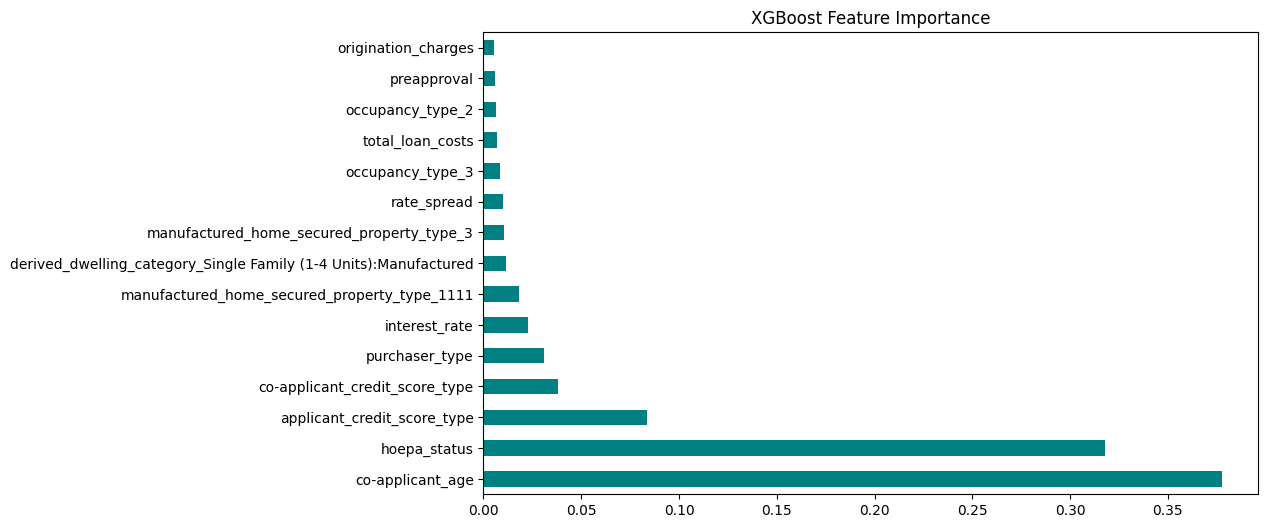

In [61]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Load processed dataset
# df = df_selected.copy()

# # Define predictors and target variable
# X = df.drop(columns=['action_taken'])  # Features
# y = df['action_taken']  # Target

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Handle missing values (replace NaN with median)
# X_train = X_train.fillna(X_train.median())
# X_test = X_test.fillna(X_test.median())

# # Standardize features for Logistic Regression
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# ### **🔹 Logistic Regression Model**
# log_model = LogisticRegression(max_iter=500)
# log_model.fit(X_train_scaled, y_train)

# # Predictions
# y_pred_log = log_model.predict(X_test_scaled)

# # Evaluation Metrics
# print("\n Logistic Regression Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred_log))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
# print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ### **🔹 XGBoost Model**
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)

# # Predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluation Metrics
# print("\n XGBoost Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
# print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# # Feature Importance Plot
# plt.figure(figsize=(10,6))
# feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
# feat_importances.nlargest(15).plot(kind='barh', color='teal')
# plt.title("XGBoost Feature Importance")
# plt.show()


#2. Loan Interest Rate Prediction - Regression

In [64]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Load dataset
# df = df_encoded.copy()

# # Define target and predictors
# target = 'interest_rate'
# predictors = df.columns[df.columns != target]

# X = df[predictors]
# y = df[target]

# # Handle missing values (impute with median for now)
# X.fillna(X.median(), inplace=True)
# y.fillna(y.median(), inplace=True)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Linear Regression Model
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_test)

# # XGBoost Regressor Model
# xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate models
# def evaluate_model(y_true, y_pred, model_name):
#     print(f"{model_name} Performance:")
#     print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
#     print(f"MSE: {mean_squared_error(y_true, y_pred)}")
#     print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
#     print(f"R^2 Score: {r2_score(y_true, y_pred)}\n")

# evaluate_model(y_test, y_pred_lr, "Linear Regression")
# evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")


<ipython-input-64-92cd3cc5833d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Linear Regression Performance:
MAE: 0.6082167493890874
MSE: 1.154819146521652
RMSE: 1.0746251190632257
R^2 Score: 0.2539969871735821

XGBoost Regressor Performance:
MAE: 0.32466882279173587
MSE: 0.3121653607377271
RMSE: 0.5587176037478389
R^2 Score: 0.7983439222394086



In [65]:
# df.columns

Index(['derived_msa-md', 'census_tract', 'action_taken', 'purchaser_type',
       'preapproval', 'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'total_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_age', 'co-applicant_age', 'applicant_age_above_62',
       'co-applicant_age_above_62', 'aus-2', 'aus-3', 'aus-4', 'aus-5',
       'denial_reason-1', 'denial_reason-2', 'denial_reason-3',
       'denial_reason-4', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 

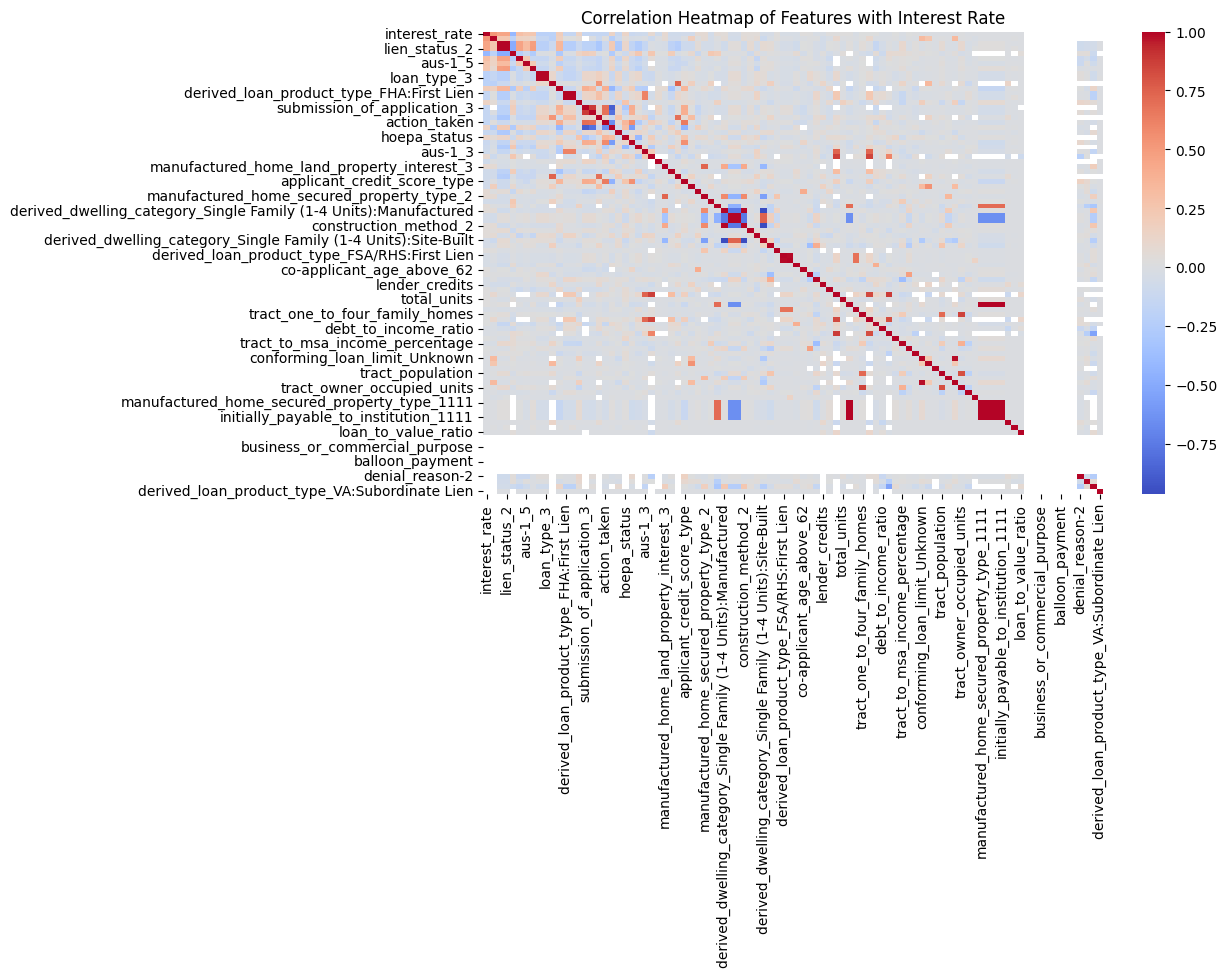

In [66]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute correlation with interest_rate
# correlation = df_encoded.corr()['interest_rate'].abs().sort_values(ascending=False)

# # Plot correlation heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df_encoded[correlation.index].corr(), cmap='coolwarm', annot=False)
# plt.title("Correlation Heatmap of Features with Interest Rate")
# plt.show()

# # Display highly correlated features
# correlation[1:15]  # Exclude interest_rate itself

# # Drop low-correlation columns
# low_corr_features = correlation[correlation < 0.05].index
# df_reduced = df_encoded.drop(columns=low_corr_features)


In [67]:
# # Load dataset
# df = df_reduced.copy()

# # Define target and predictors
# target = 'interest_rate'
# predictors = df.columns[df.columns != target]

# X = df[predictors]
# y = df[target]

# # Handle missing values (impute with median for now)
# X.fillna(X.median(), inplace=True)
# y.fillna(y.median(), inplace=True)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Linear Regression Model
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_test)

# # XGBoost Regressor Model
# xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate models
# def evaluate_model(y_true, y_pred, model_name):
#     print(f"{model_name} Performance:")
#     print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
#     print(f"MSE: {mean_squared_error(y_true, y_pred)}")
#     print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
#     print(f"R^2 Score: {r2_score(y_true, y_pred)}\n")

# evaluate_model(y_test, y_pred_lr, "Linear Regression")
# evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

<ipython-input-67-cfa3bebaa6f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Linear Regression Performance:
MAE: 0.6086826931649091
MSE: 1.1637643557579656
RMSE: 1.0787791042460757
R^2 Score: 0.2482184606737814

XGBoost Regressor Performance:
MAE: 0.3245957906663658
MSE: 0.3145094705163352
RMSE: 0.5608114393593762
R^2 Score: 0.7968296479372335



In [70]:
# df.columns

Index(['action_taken', 'purchaser_type', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'interest_rate', 'rate_spread', 'hoepa_status',
       'total_loan_costs', 'origination_charges', 'discount_points',
       'loan_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_age', 'co-applicant_age',
       'applicant_age_above_62', 'aus-3', 'denial_reason-1', 'denial_reason-2',
       'denial_reason-3', 'denial_reason-4',
       'derived_loan_product_type_Conventional:Subordinate Lien',
       'derived_loan_product_type_FHA:First Lien',
       'derived_loan_product_type_VA:First Lien',
       'derived_loan_product_type_VA:Subordinate Lien',
       'conforming_loan_limit_NC', 'loan_type_2', 'loan_type_3',
       'loan_purpose_2', 'loan_purpose_4', 'loan_purpo

In [72]:
# selected_columns = [
#     'interest_rate',  # Include your target variable for modeling
#     'loan_amount',
#     'loan_term',
#     'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5',
#     'loan_type_2', 'loan_type_3',
#     'lien_status_2',
#     'negative_amortization',
#     'interest_only_payment',
#     'balloon_payment',
#     'other_nonamortizing_features',
#     'conforming_loan_limit_NC',
#     'derived_loan_product_type_Conventional:Subordinate Lien',
#     'derived_loan_product_type_FHA:First Lien',
#     'derived_loan_product_type_VA:First Lien',
#     'derived_loan_product_type_VA:Subordinate Lien',
#     'applicant_credit_score_type',
#     'co-applicant_credit_score_type',
#     'co-applicant_age',
#     'applicant_age_above_62',
#     'occupancy_type_3',
#     'manufactured_home_secured_property_type_2',
#     'manufactured_home_land_property_interest_3',
#     'submission_of_application_3',
#     'initially_payable_to_institution_3',
#     'purchaser_type',
#     'business_or_commercial_purpose',
#     'open-end_line_of_credit',
#     'reverse_mortgage'
# ]

# # Create new DataFrame with selected columns
# df_interest = df_encoded[selected_columns].copy()

# # Drop rows where target ('interest_rate') is missing
# df_interest = df_interest.dropna(subset=['interest_rate'])

# # Impute predictors with median
# df_interest['co-applicant_age'] = df_interest['co-applicant_age'].fillna(df_interest['co-applicant_age'].median())
# df_interest['loan_term'] = df_interest['loan_term'].fillna(df_interest['loan_term'].median())

# # Path to your SQLite database
# db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'

# # Connect and save DataFrame to SQLite database
# conn = sqlite3.connect(db_path)
# df_interest.to_sql('Interest_Rate_Features', conn, if_exists='replace', index=False)

# # Close the connection
# conn.close()

# print("df_interest successfully saved to 'Interest_Rate_Features' table in SQLite database.")

df_interest successfully saved to 'Interest_Rate_Features' table in SQLite database.


#3. High risk borrowers classification

In [73]:
# df.columns

Index(['action_taken', 'purchaser_type', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'interest_rate', 'rate_spread', 'hoepa_status',
       'total_loan_costs', 'origination_charges', 'discount_points',
       'loan_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_age', 'co-applicant_age',
       'applicant_age_above_62', 'aus-3', 'denial_reason-1', 'denial_reason-2',
       'denial_reason-3', 'denial_reason-4',
       'derived_loan_product_type_Conventional:Subordinate Lien',
       'derived_loan_product_type_FHA:First Lien',
       'derived_loan_product_type_VA:First Lien',
       'derived_loan_product_type_VA:Subordinate Lien',
       'conforming_loan_limit_NC', 'loan_type_2', 'loan_type_3',
       'loan_purpose_2', 'loan_purpose_4', 'loan_purpo

In [74]:
# df=df_encoded.copy()

In [75]:
# print(df[['applicant_credit_score_type', 'debt_to_income_ratio', 'loan_to_value_ratio',
#           'denial_reason-1', 'interest_rate']].head(10))

   applicant_credit_score_type  debt_to_income_ratio  loan_to_value_ratio  \
0                           10                   NaN                  NaN   
1                           10                   NaN                  NaN   
2                           10                   NaN                  NaN   
3                           10                   NaN                  NaN   
4                           10                   NaN                  NaN   
5                           10                   NaN                  NaN   
6                           10                   NaN                  NaN   
7                           10                   NaN                  NaN   
8                           10                   NaN                  NaN   
9                           10                   NaN                  NaN   

   denial_reason-1  interest_rate  
0               10          7.000  
1               10          6.500  
2               10          5.625  
3       

In [76]:
# # Compute 75th percentile for interest rate once
# interest_rate_threshold = df['interest_rate'].quantile(0.75)

# # Fix classification logic
# def classify_high_risk(row):
#     denial_reasons = ['Credit history', 'Debt-to-income ratio', 'Insufficient collateral']

#     # Check denial reason safely (handle NaN values)
#     denial_high_risk = row['denial_reason-1'] in denial_reasons if pd.notna(row['denial_reason-1']) else False

#     if ((row['applicant_credit_score_type'] < 600) or
#         (row['debt_to_income_ratio'] > 50) or
#         (row['loan_to_value_ratio'] > 85) or
#         denial_high_risk or
#         (row['interest_rate'] > interest_rate_threshold) or
#         (pd.isna(row['applicant_credit_score_type']) and row['debt_to_income_ratio'] > 45)):
#         return 1  # High-risk borrower
#     else:
#         return 0  # Low-risk borrower

# # Apply classification
# df['high_risk'] = df.apply(classify_high_risk, axis=1)

# # Verify class distribution
# print(df['high_risk'].value_counts())


high_risk
1    536841
Name: count, dtype: int64


In [80]:
# def classify_risk(row):
#     dti = row['debt_to_income_ratio']
#     ltv = row['loan_to_value_ratio']
#     rate = row['interest_rate']

#     # Very High Risk
#     if (pd.notna(dti) and dti >= 48) or \
#        (pd.notna(ltv) and ltv >= 95) or \
#        (pd.notna(rate) and rate >= 9):
#         return 5

#     # High Risk
#     elif (pd.notna(dti) and 45 <= dti < 48) or \
#          (pd.notna(ltv) and 90 <= ltv < 95) or \
#          (pd.notna(rate) and 8 <= rate < 9):
#         return 4

#     # Moderate Risk
#     elif (pd.notna(dti) and 42 <= dti < 45) or \
#          (pd.notna(ltv) and 85 <= ltv < 90) or \
#          (pd.notna(rate) and 7 <= rate < 8):
#         return 3

#     # Low Risk
#     elif (pd.notna(dti) and 39 <= dti < 42) or \
#          (pd.notna(ltv) and 75 <= ltv < 85) or \
#          (pd.notna(rate) and 6 <= rate < 7):
#         return 2

#     # Very Low Risk
#     elif (pd.notna(dti) and dti < 39) and \
#          (pd.notna(ltv) and ltv < 75) and \
#          (pd.notna(rate) and rate < 6):
#         return 1

#     # Default to Moderate Risk (3) if unclear
#     else:
#         return 3

# # Apply the revised function
# df['risk_level'] = df.apply(classify_risk, axis=1)

# # Check distribution clearly again
# print("Revised Borrower Risk Level Distribution:")
# print(df['risk_level'].value_counts().sort_index())

Revised Borrower Risk Level Distribution:
risk_level
1      1469
2     94174
3    245883
4     54749
5    140566
Name: count, dtype: int64


In [79]:
#print(df[['applicant_credit_score_type', 'debt_to_income_ratio', 'loan_to_value_ratio', 'interest_rate']].describe())

       applicant_credit_score_type  debt_to_income_ratio  loan_to_value_ratio  \
count                536841.000000         165220.000000         3.388180e+05   
mean                      5.451596             42.798027         5.482874e+02   
std                       4.122233              3.985864         2.428381e+05   
min                       0.000000             36.000000         3.000000e-03   
25%                       2.000000             39.000000         6.725100e+01   
50%                       4.000000             43.000000         8.000000e+01   
75%                      10.000000             46.000000         9.500000e+01   
max                      10.000000             49.000000         1.400000e+08   

       interest_rate  
count  340510.000000  
mean        6.981102  
std         1.565336  
min         0.000000  
25%         6.125000  
50%         6.750000  
75%         7.500000  
max        19.625000  


Borrower Risk Level Distribution (%):
risk_level
1     0.273638
2    17.542252
3    45.801830
4    10.198364
5    26.183917
Name: proportion, dtype: float64

Summary Statistics for Key Risk Factors by Risk Level:
           debt_to_income_ratio                                               \
                          count       mean       std   min   25%   50%   75%   
risk_level                                                                     
1                        1469.0  37.012253  0.822777  36.0  36.0  37.0  38.0   
2                       18611.0  38.877116  1.674475  36.0  37.0  39.0  40.0   
3                       30750.0  41.148455  2.581107  36.0  39.0  42.0  43.0   
4                       31566.0  43.643065  3.316493  36.0  41.0  45.0  46.0   
5                       82824.0  44.072068  4.175052  36.0  41.0  44.0  48.0   

                 loan_to_value_ratio               ...                       \
             max               count         mean  ...    75%      

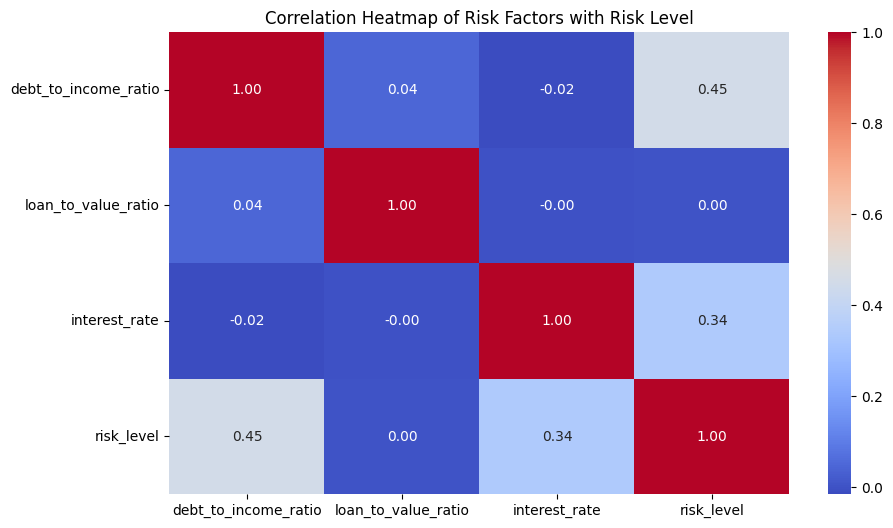

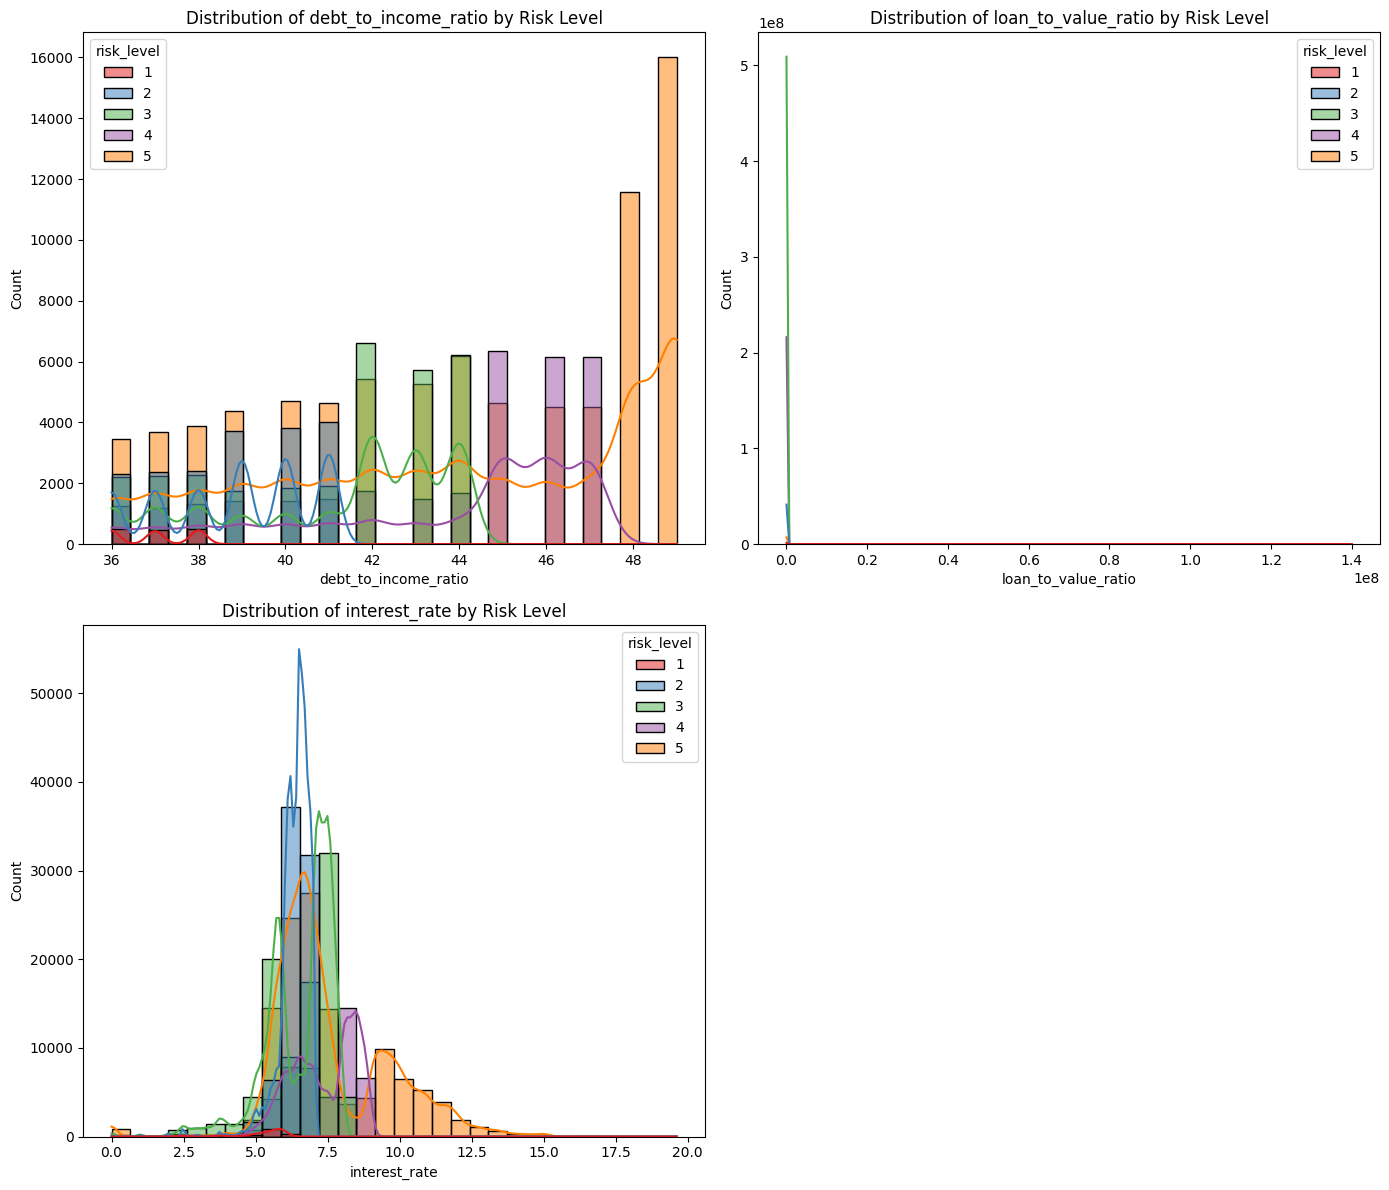

<ipython-input-81-74a6aa8eb70d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_level', y=col, data=df, palette='Set2')


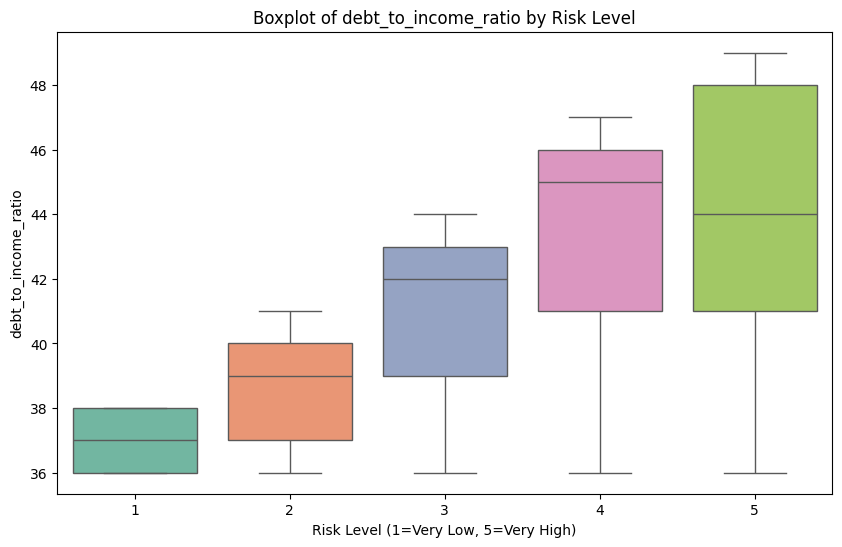

<ipython-input-81-74a6aa8eb70d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_level', y=col, data=df, palette='Set2')


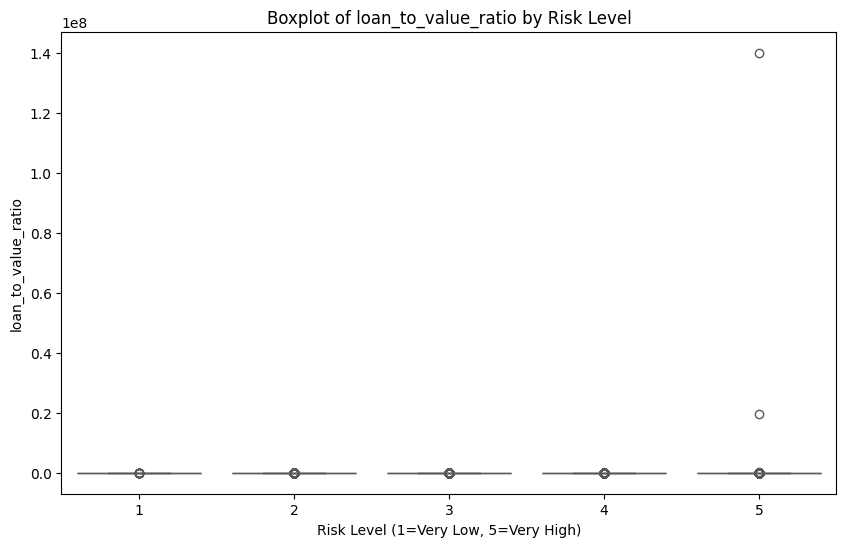

<ipython-input-81-74a6aa8eb70d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_level', y=col, data=df, palette='Set2')


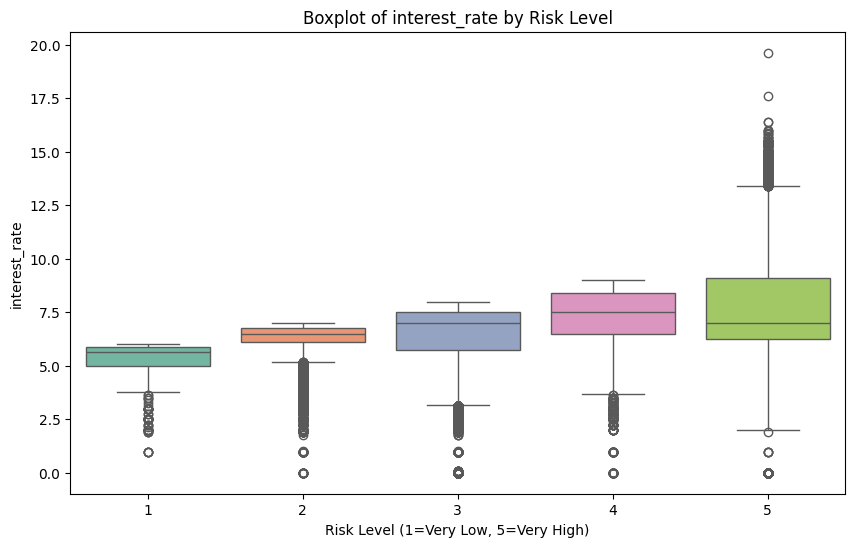

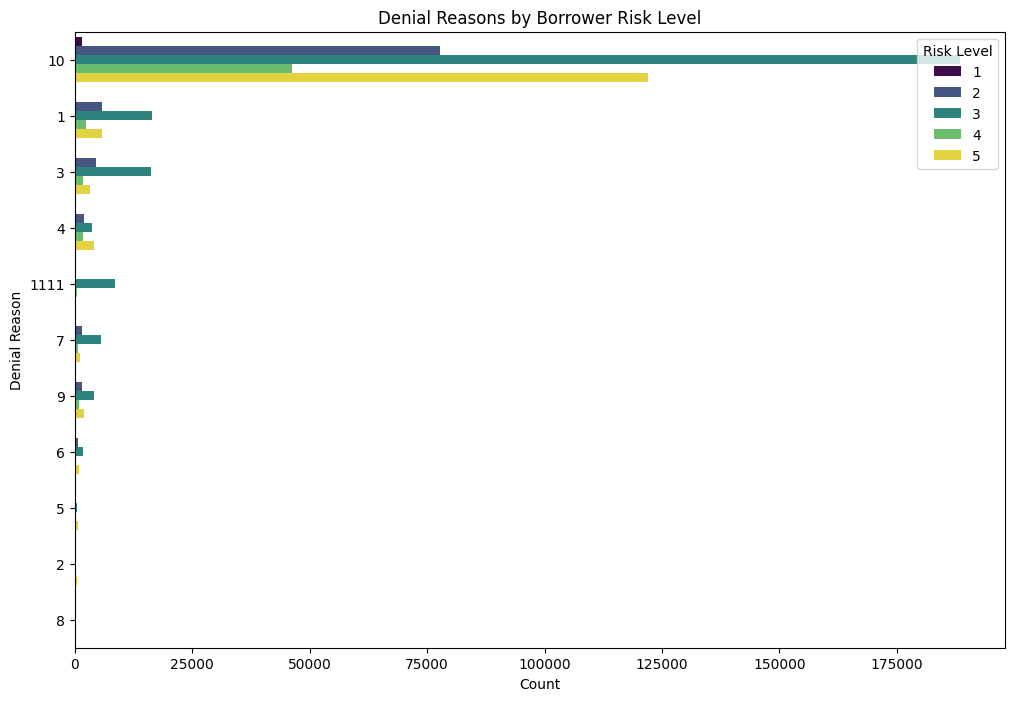

In [81]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 🔹 Check class balance clearly for multiple risk levels
# print("Borrower Risk Level Distribution (%):")
# print(df['risk_level'].value_counts(normalize=True).sort_index() * 100)

# # 🔹 Summary statistics for key risk factors
# risk_factors = ['debt_to_income_ratio', 'loan_to_value_ratio', 'interest_rate']
# print("\nSummary Statistics for Key Risk Factors by Risk Level:")
# print(df.groupby('risk_level')[risk_factors].describe())

# # 🔹 Correlation heatmap (risk_level as numeric)
# plt.figure(figsize=(10, 6))
# sns.heatmap(df[risk_factors + ['risk_level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap of Risk Factors with Risk Level")
# plt.show()

# # 🔹 Histograms for key features by Risk Level
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# axes = axes.flatten()

# for idx, col in enumerate(risk_factors):
#     sns.histplot(data=df, x=col, hue='risk_level', bins=30, kde=True, palette='Set1', ax=axes[idx])
#     axes[idx].set_title(f'Distribution of {col} by Risk Level')

# # Remove unused subplot
# fig.delaxes(axes[-1])

# plt.tight_layout()
# plt.show()

# # 🔹 Boxplots to compare Risk Level vs. key features
# for col in risk_factors:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='risk_level', y=col, data=df, palette='Set2')
#     plt.title(f'Boxplot of {col} by Risk Level')
#     plt.xlabel("Risk Level (1=Very Low, 5=Very High)")
#     plt.ylabel(col)
#     plt.show()

# # 🔹 Bar chart for denial reasons (if available)
# if 'denial_reason-1' in df.columns:
#     plt.figure(figsize=(12, 8))
#     sns.countplot(y='denial_reason-1', hue='risk_level', data=df,
#                   order=df['denial_reason-1'].value_counts().index, palette='viridis')
#     plt.title("Denial Reasons by Borrower Risk Level")
#     plt.xlabel("Count")
#     plt.ylabel("Denial Reason")
#     plt.legend(title="Risk Level", loc="upper right")
#     plt.show()


In [83]:
# # Required Libraries
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import pandas as pd
# import numpy as np

# # Step 1: Define Target & Features (Risk Level Multiclass)
# target = 'risk_level'
# features = df.drop(columns=[target])

# # Keep numeric features only
# features = features.select_dtypes(include=[np.number])

# # Step 2: Handle Missing Values
# features = features.fillna(features.median())

# # Step 3: Train-Test Split (Stratified for multi-class)
# X_train, X_test, y_train, y_test = train_test_split(
#     features, df[target],
#     test_size=0.2, random_state=42, stratify=df[target]
# )

# # Step 4: Model Training (Random Forest & XGBoost)
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# }

# # Train and Evaluate Models with corrected labels for XGBoost
# for name, model in models.items():
#     if name == "XGBoost":
#         # Adjust labels for XGBoost
#         y_train_adj = y_train - 1
#         y_test_adj = y_test - 1

#         model.fit(X_train, y_train_adj)
#         y_pred = model.predict(X_test) + 1  # Shift predictions back to original labels
#     else:
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#     print(f"\n{name} Model Performance (Multi-class Classification):")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
#     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
#     print("Classification Report:\n", classification_report(y_test, y_pred))

# # Step 5: Feature Importance
# rf_importances = models["Random Forest"].feature_importances_
# xgb_importances = models["XGBoost"].feature_importances_

# feature_importance_df = pd.DataFrame({
#     "Feature": features.columns,
#     "RandomForest_Importance": rf_importances,
#     "XGBoost_Importance": xgb_importances
# }).sort_values(by="XGBoost_Importance", ascending=False)

# print("\nTop 10 Most Important Features (XGBoost):")
# print(feature_importance_df.head(10))



Random Forest Model Performance (Multi-class Classification):
Accuracy: 0.9796

Confusion Matrix:
 [[   25   226    43     0     0]
 [    0 18091   744     0     0]
 [    0  1146 48029     2     0]
 [    0     1    15 10929     5]
 [    0     0     4     4 28105]] 

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.09      0.16       294
           2       0.93      0.96      0.94     18835
           3       0.98      0.98      0.98     49177
           4       1.00      1.00      1.00     10950
           5       1.00      1.00      1.00     28113

    accuracy                           0.98    107369
   macro avg       0.98      0.80      0.82    107369
weighted avg       0.98      0.98      0.98    107369



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Performance (Multi-class Classification):
Accuracy: 0.9937

Confusion Matrix:
 [[  294     0     0     0     0]
 [    0 18734   101     0     0]
 [    0   579 48598     0     0]
 [    0     0     0 10950     0]
 [    0     0     0     0 28113]] 

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       294
           2       0.97      0.99      0.98     18835
           3       1.00      0.99      0.99     49177
           4       1.00      1.00      1.00     10950
           5       1.00      1.00      1.00     28113

    accuracy                           0.99    107369
   macro avg       0.99      1.00      1.00    107369
weighted avg       0.99      0.99      0.99    107369


Top 10 Most Important Features (XGBoost):
                                         Feature  RandomForest_Importance  \
82                   submission_of_application_3                 0.006565   
9                           

In [84]:
# # Path to your SQLite database
# db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'

# # Connect and save DataFrame to SQLite database
# conn = sqlite3.connect(db_path)
# df.to_sql('Risk_classifier', conn, if_exists='replace', index=False)

# # Close the connection
# conn.close()

# print("df_interest successfully saved to 'Risk_classifier' table in SQLite database.")

df_interest successfully saved to 'Risk_classifier' table in SQLite database.


In [85]:
# df

,derived_msa-md,census_tract,action_taken,purchaser_type,preapproval,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,...,initially_payable_to_institution_1111,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7,aus-1_1111,high_risk,risk_level
0,-1.804122,2.451027e+10,5,2,1,0,0,0,205000.0,NaN,...,0,0,0,0,0,1,0,0,1,3
1,0.650320,5.106905e+10,5,2,1,0,0,0,235000.0,NaN,...,0,0,0,0,0,1,0,0,1,2
2,-0.189857,2.403788e+10,5,2,1,0,0,0,505000.0,NaN,...,0,0,0,0,0,1,0,0,1,3
3,-1.804122,2.400541e+10,5,2,1,0,0,0,685000.0,NaN,...,0,0,0,0,0,1,0,0,1,2
4,0.394810,5.101310e+10,5,2,1,0,0,0,455000.0,NaN,...,0,0,0,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536836,0.016183,5.176006e+10,5,2,1,0,0,0,205000.0,NaN,...,0,0,0,0,0,1,0,0,1,2
536837,0.016183,5.108720e+10,5,2,1,0,0,0,305000.0,NaN,...,0,0,0,0,0,1,0,0,1,2
536838,0.394810,5.117901e+10,5,2,1,0,0,0,665000.0,NaN,...,0,0,0,0,0,1,0,0,1,3
536839,0.394810,2.403380e+10,5,2,1,0,0,0,325000.0,NaN,...,0,0,0,0,0,1,0,0,1,2


In [82]:
# # Required Libraries
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import pandas as pd
# import numpy as np

# # Step 1: Define Target & Features (Risk Level Multiclass)
# target = 'risk_level'
# features = df.drop(columns=[target])

# # Drop any irrelevant or categorical columns not preprocessed
# features = features.select_dtypes(include=[np.number])

# # Step 2: Handle Missing Values
# features = features.fillna(features.median())

# # Step 3: Train-Test Split (Stratified for multi-class)
# X_train, X_test, y_train, y_test = train_test_split(
#     features, df[target],
#     test_size=0.2, random_state=42, stratify=df[target]
# )

# # Step 4: Model Training (Random Forest & XGBoost for multi-class)
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# }

# # Training and Evaluation (multi-class metrics)
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     print(f"\n{name} Model Performance (Multi-class Classification):")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
#     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
#     print("Classification Report:\n", classification_report(y_test, y_pred))

# # Step 5: Feature Importance
# rf_importances = models["Random Forest"].feature_importances_
# xgb_importances = models["XGBoost"].feature_importances_

# feature_importance_df = pd.DataFrame({
#     "Feature": features.columns,
#     "RandomForest_Importance": rf_importances,
#     "XGBoost_Importance": xgb_importances
# }).sort_values(by="XGBoost_Importance", ascending=False)

# print("\nTop 10 Most Important Features (XGBoost):")
# print(feature_importance_df.head(10))



Random Forest Model Performance (Multi-class Classification):
Accuracy: 0.9796

Confusion Matrix:
 [[   25   226    43     0     0]
 [    0 18091   744     0     0]
 [    0  1146 48029     2     0]
 [    0     1    15 10929     5]
 [    0     0     4     4 28105]] 

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.09      0.16       294
           2       0.93      0.96      0.94     18835
           3       0.98      0.98      0.98     49177
           4       1.00      1.00      1.00     10950
           5       1.00      1.00      1.00     28113

    accuracy                           0.98    107369
   macro avg       0.98      0.80      0.82    107369
weighted avg       0.98      0.98      0.98    107369



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [55]:
# # 🔹 Step 1: Define Target & Features
# target = 'high_risk'
# features = df.drop(columns=[target])  # Drop target variable

# # 🔹 Step 2: Handle Missing Values (Fill or Drop)
# features = features.fillna(features.median())  # Fill missing values with median

# # 🔹 Step 3: Train-Test Split with Stratification
# X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42, stratify=df[target])

# # 🔹 Step 4: Model Training (Random Forest, XGBoost)
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# }

# # 🔹 Train models and evaluate performance
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     print(f"\n{name} Model Performance:")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#     #print(f"Precision: {precision_score(y_test, y_pred):.4f}")
#     print(f"Recall: {recall_score(y_test, y_pred):.4f}")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#     print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # 🔹 Step 5: Feature Importance
# rf_feature_importance = models["Random Forest"].feature_importances_
# xgb_feature_importance = models["XGBoost"].feature_importances_

# feature_importance_df = pd.DataFrame({
#     "Feature": features.columns,
#     "RandomForest_Importance": rf_feature_importance,
#     "XGBoost_Importance": xgb_feature_importance
# }).sort_values(by="XGBoost_Importance", ascending=False)

# print("\nTop 10 Most Important Features for High-Risk Classification (XGBoost):")
# print(feature_importance_df.head(10))


Random Forest Model Performance:
Accuracy: 1.0000


NameError: name 'recall_score' is not defined

# Model 4

In [38]:
# df = df_encoded.copy()


In [42]:
# df.columns

Index(['derived_msa-md', 'census_tract', 'action_taken', 'purchaser_type',
       'preapproval', 'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'total_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_age', 'co-applicant_age', 'applicant_age_above_62',
       'co-applicant_age_above_62', 'aus-2', 'aus-3', 'aus-4', 'aus-5',
       'denial_reason-1', 'denial_reason-2', 'denial_reason-3',
       'denial_reason-4', 'tract_population',
       'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 

In [43]:
# # Calculate percentage of NaN values per column
# nan_percentages = df.isna().mean() * 100

# # Filter columns with NaN values
# nan_columns = nan_percentages[nan_percentages > 0].sort_values(ascending=False)

# # Display columns and percentage of NaNs clearly
# print("Columns with NaN values and their percentages:")
# print(nan_columns)


Columns with NaN values and their percentages:
denial_reason-4         99.934990
denial_reason-3         99.400567
aus-5                   99.286940
aus-4                   99.203675
aus-3                   98.583193
denial_reason-2         96.133678
aus-2                   95.698354
applicant_age           86.703139
lender_credits          84.943400
intro_rate_period       79.062516
discount_points         70.992715
debt_to_income_ratio    69.223662
rate_spread             52.838177
total_loan_costs        51.792616
origination_charges     51.551018
loan_to_value_ratio     36.886713
interest_rate           36.571536
co-applicant_age        33.161960
property_value          22.731870
income                  13.579812
loan_term                2.877575
census_tract             0.897659
total_units              0.233030
dtype: float64


In [47]:
# # Step 1: Drop columns with excessive missingness
# cols_to_drop_high_nan = [
#     'denial_reason-4', 'denial_reason-3', 'denial_reason-2',
#     'aus-5', 'aus-4', 'aus-3', 'aus-2',
#     'applicant_age', 'lender_credits', 'intro_rate_period',
#     'discount_points', 'debt_to_income_ratio', 'rate_spread',
#     'total_loan_costs', 'origination_charges', 'census_tract',
#     'derived_msa-md',
#     'action_taken',
#     'denial_reason-1',
#     'aus-1_2', 'aus-1_3', 'aus-1_4', 'aus-1_5', 'aus-1_6', 'aus-1_7', 'aus-1_1111',
#     'hoepa_status',
#     'conforming_loan_limit_Unknown'
# ]
# df_clean = df.drop(columns=cols_to_drop_high_nan, errors='ignore')

# # Step 2: Drop rows with missing target (property_value)
# df_clean = df_clean.dropna(subset=['property_value'])

# # Step 3: Impute moderate missingness columns with median
# for col in ['loan_to_value_ratio', 'interest_rate', 'co-applicant_age']:
#     df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# # Step 4: Impute low missingness columns with median
# for col in ['income', 'loan_term', 'total_units']:
#     df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# # Check results clearly
# print("Remaining missing values per column:\n", df_clean.isna().sum())


Remaining missing values per column:
 purchaser_type                           0
preapproval                              0
reverse_mortgage                         0
open-end_line_of_credit                  0
business_or_commercial_purpose           0
                                        ..
submission_of_application_3              0
submission_of_application_1111           0
initially_payable_to_institution_2       0
initially_payable_to_institution_3       0
initially_payable_to_institution_1111    0
Length: 66, dtype: int64


In [48]:
# df_clean.columns

Index(['purchaser_type', 'preapproval', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'loan_term',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'total_units',
       'income', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'co-applicant_age',
       'applicant_age_above_62', 'co-applicant_age_above_62',
       'tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units',
       'derived_loan_product_type_Conventional:Subordinate Lien',
       'derived_loan_product_type_FHA:First Lien',
       'derived_loan_product_type_FHA:Subordinate Lien',
       'derived_loan_product_type_FSA/RHS:First

In [52]:
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# target = 'property_value'
# features = df.drop(columns=[target])

# X = df_clean.drop(columns=[target])
# y = df_clean[target]

# # For modeling, convert categorical columns with One-Hot Encoding if present
# X_encoded = pd.get_dummies(X, drop_first=True)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# models = {
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     print(f"\n{name} Model Performance:")
#     print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
#     print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
#     print(f"R²: {r2_score(y_test, y_pred):.4f}")

KeyboardInterrupt: 

In [53]:
# import pandas as pd
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Step 1: Select only numeric columns (non-target)
# X = df_clean.select_dtypes(include=[np.number]).drop(columns=['property_value'], errors='ignore')

# # Step 2: Drop columns with high pairwise correlation (> 0.85)
# # Compute correlation matrix
# corr_matrix = X.corr().abs()

# # Upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find columns to drop
# to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.85)]

# print("Columns dropped due to high correlation:")
# print(to_drop_corr)

# # Drop them
# X_reduced = X.drop(columns=to_drop_corr)

# # Step 3: Optional – Use VIF to drop high multicollinearity (VIF > 10)
# from statsmodels.tools.tools import add_constant

# X_vif = add_constant(X_reduced)

# vif_data = pd.DataFrame()
# vif_data["feature"] = X_vif.columns
# vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# # Drop 'const' for display
# vif_data = vif_data[vif_data["feature"] != "const"]

# # Filter features with high VIF
# high_vif = vif_data[vif_data["VIF"] > 10]["feature"].tolist()

# print("\nColumns dropped due to high VIF (>10):")
# print(high_vif)

# # Final set after removing high-VIF features
# X_final = X_reduced.drop(columns=high_vif, errors='ignore')

# # Update df_clean to keep only final selected features + target
# df_clean = df_clean[X_final.columns.tolist() + ['property_value']]


Columns dropped due to high correlation:
['tract_one_to_four_family_homes', 'derived_dwelling_category_Single Family (1-4 Units):Site-Built', 'loan_type_2', 'loan_type_3', 'loan_type_4', 'lien_status_2', 'construction_method_2', 'manufactured_home_secured_property_type_3', 'manufactured_home_land_property_interest_5', 'manufactured_home_land_property_interest_1111', 'submission_of_application_3', 'initially_payable_to_institution_3', 'initially_payable_to_institution_1111']


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Columns dropped due to high VIF (>10):
[]


In [54]:
df_clean

,purchaser_type,preapproval,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,loan_term,negative_amortization,...,occupancy_type_3,manufactured_home_secured_property_type_2,manufactured_home_secured_property_type_1111,manufactured_home_land_property_interest_2,manufactured_home_land_property_interest_3,manufactured_home_land_property_interest_4,submission_of_application_2,submission_of_application_1111,initially_payable_to_institution_2,property_value
0,2,1,0,0,0,205000.0,80.0,7.000,360.0,0,...,0,0,0,0,0,0,0,0,0,205000.0
1,2,1,0,0,0,235000.0,80.0,6.500,360.0,0,...,0,0,0,0,0,0,0,0,0,235000.0
2,2,1,0,0,0,505000.0,80.0,5.625,360.0,0,...,0,0,0,0,0,0,0,0,0,505000.0
3,2,1,0,0,0,685000.0,80.0,6.375,360.0,0,...,0,0,0,0,0,0,0,0,0,755000.0
4,2,1,0,0,0,455000.0,80.0,5.500,360.0,0,...,0,0,0,0,0,0,0,0,0,455000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536836,2,1,0,0,0,205000.0,80.0,6.625,360.0,0,...,0,0,0,0,0,0,0,0,0,205000.0
536837,2,1,0,0,0,305000.0,80.0,6.000,360.0,0,...,0,0,0,0,0,0,0,0,0,305000.0
536838,2,1,0,0,0,665000.0,80.0,5.625,360.0,0,...,0,0,0,0,0,0,0,0,0,1165000.0
536839,2,1,0,0,0,325000.0,80.0,6.625,360.0,0,...,0,0,0,0,0,0,0,0,0,335000.0


In [55]:
# # Path to your SQLite database
# db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'

# # Connect and save DataFrame to SQLite database
# conn = sqlite3.connect(db_path)
# df_clean.to_sql('Property_Values', conn, if_exists='replace', index=False)

# # Close the connection
# conn.close()

# print("df_interest successfully saved to 'Property_Values' table in SQLite database.")

df_interest successfully saved to 'Property_Values' table in SQLite database.



Linear Regression Model Performance:
Mean Absolute Error (MAE): 209001.61
Root Mean Squared Error (RMSE): 7071648.84
R² Score: 0.1676
